# Analyse simulations 1D champ de mil 


In [1]:
filepath = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/data_processing/'

exec(open(filepath+'fonctions1d.py').read())

from parflow import read_pfb, read_pfb_sequence, ParflowBinaryReader

from PFlibs import io_pfb
from PFlibs import drv_vegm_io as vegio


In [2]:


#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_09_def_hum/' ####
#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_09_exp/' ####

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_09_def/' ####

datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_11_def_spinup_387/' ####

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_11_def/' ####

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_11_def_30min/' ####


#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/parflow_python/results/'

#datadir_mil3_2  =  '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_mil_step1/sim_2/sim_2/'


#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/milere_1d_cecile/simus_mil_step1a/'


#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_06_09_def_en_hum_old_params/'

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new_3H_mil/sim_493/sim_493/'

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_a_etudier/sim_1/sim_1/'

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH4c/sim_10/sim_10'

#######
#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new/simus_mil_06_09/'

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new_step1b_mil_LR/sim_3/sim_3/'

#datadir_mil3_2 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new_step1/sim_12/sim_12/'
#datadir_mil3_2 = '/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new_step2_2_mil/sim_1/sim_1/'


#datadir_mil3_5 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_c_06_11_n3_5/'
#datadir_mil5_1 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/simus_mil_c_06_11_n5_1/'


path_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/'
#path_mil1 = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d/'


outputdir_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/outs/mil/'


obwdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/NAD_dataset/'

evaldir_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/Eval_2005_2012/Eval_2005_2012/'


In [3]:
## forcçages

## Mil
forc_mil = pd.read_csv(path_mil + "forc_mil_06_11.txt", delim_whitespace=True, header = None,\
names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
forc_mil.index = pd.date_range("2006-01-01 00:00:00", periods=forc_mil.shape[0],freq='30min')

## Observation mil

obs_en_mil = pd.read_csv(evaldir_mil + "en_mil_obs_06_11.txt", delim_whitespace=True,\
 index_col = None,na_values= ['-9999.000','-6999.00000'])
obs_en_mil.index = pd.date_range("2006-01-01 00:00:00", periods=obs_en_mil.shape[0],freq='30min')
obs_en_mil['ET'] = 1800*obs_en_mil['LE']/2.5104e06
obs_en_mil['Rn_obs'] = forc_mil.Lwin - obs_en_mil.LWout + forc_mil.Swin - obs_en_mil.SWout
obs_en_mil['Rn_obs_in'] = forc_mil.Lwin  + forc_mil.Swin  
obs_en_mil['Rn_obs_out'] = obs_en_mil.LWout + obs_en_mil.SWout

#obs_en_mil.alb.replace(np.NaN, 0, inplace=True)
obs_en_mil['G']=np.mean([obs_en_mil.G1,obs_en_mil.G2,obs_en_mil.G3],axis=0)

obs_en_mil['H_LE'] = obs_en_mil['H'] + obs_en_mil['LE']
obs_en_mil['Rn_G'] = obs_en_mil['Rn_obs'] - obs_en_mil['G1']

obs_en_mil=obs_en_mil.loc['2006':'2011']

    
lai_mil_j = pd.read_csv(path_mil+'pheno_mil_cecile_2005_2012_j.txt', delim_whitespace=True,header=None,\
                   index_col = None)
lai_mil_j =lai_mil_j.set_index(pd.date_range("2005-01-01",periods=lai_mil_j.shape[0],freq="D"))

lai_mil_j=lai_mil_j.loc['2006':'2011']



## ETR

In [65]:
etr_mil3_2 = etr_mil1(datadir_mil3_2,"etr_mil_06_11_n3_2.nc")



<xarray.Dataset>
Dimensions:         (time: 52584, y: 1)
Coordinates:
  * time            (time) datetime64[ns] 2006-01-01 ... 2011-12-31T23:00:00
    reference_time  datetime64[ns] 2006-01-01
Dimensions without coordinates: y
Data variables:
    evaptot         (time, y) float64 0.04195 0.02037 ... 3.48e-13 6.423e-14
    evapveg         (time, y) float64 0.0001518 8.526e-05 ... 7.515e-14
    evapsoil        (time, y) float64 0.0418 0.02028 ... -5.883e-14 -1.093e-14
    trans           (time, y) float64 0.0001518 8.526e-05 6.268e-05 ... 0.0 0.0
    infl            (time, y) float64 -0.0418 -0.02028 -0.01499 ... 0.0 0.0

Text(0.25, 0.9, 'KGE$_{2009}$ =0.45')

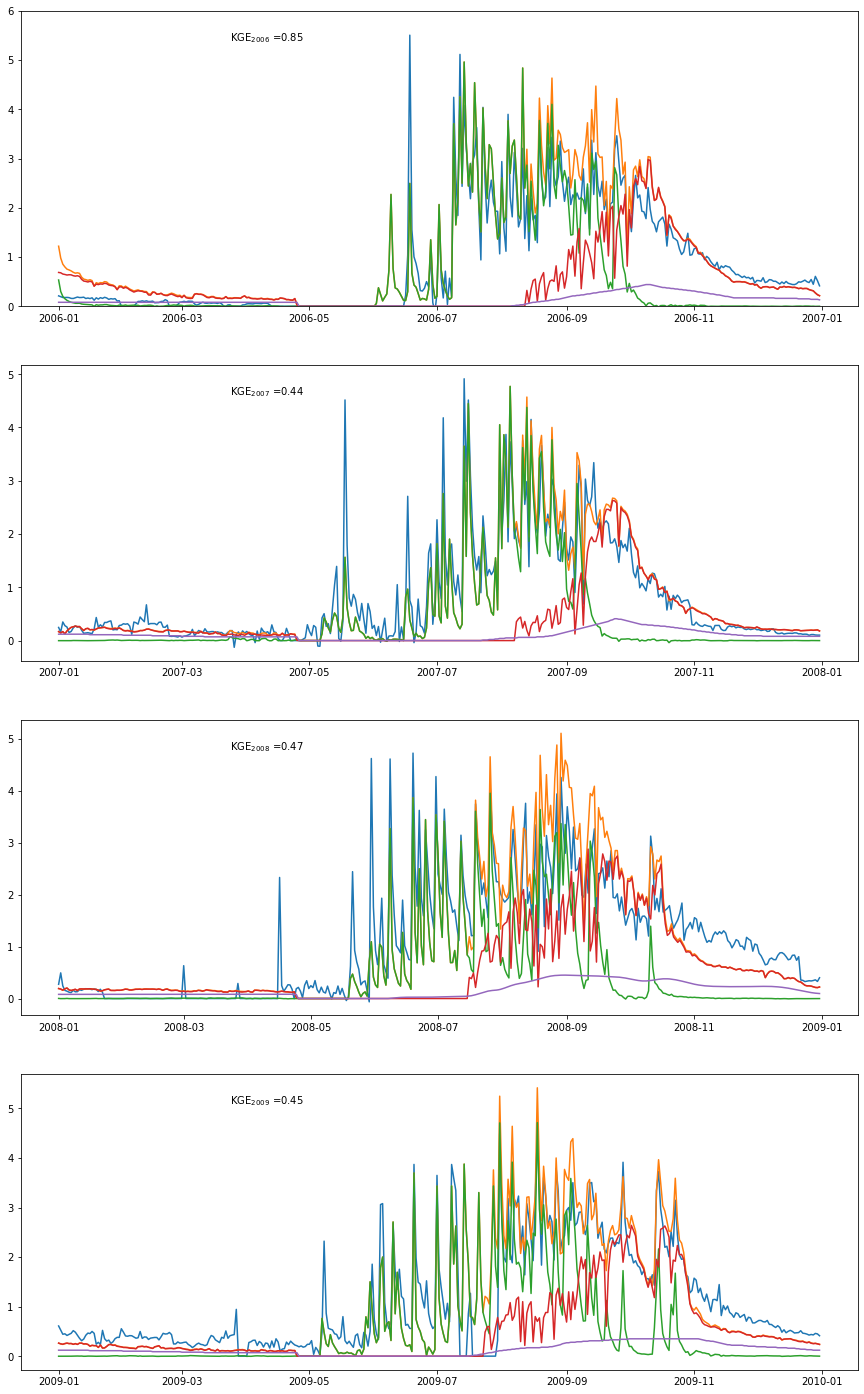

In [7]:
## ETR mil/ année


ev2006 = obs_en_mil.ET.resample('D').sum().loc['2006'][121:197]
ev2007 = obs_en_mil.ET.resample('D').sum().loc['2007'][121:197]
ev2008 = obs_en_mil.ET.resample('D').sum().loc['2008'][121:197]
ev2009 = obs_en_mil.ET.resample('D').sum().loc['2009'][121:197]

#sm2006 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2006')[305:365]
#sm2007 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2007')[305:365]
#sm2008 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2008')[305:365]
#sm2009 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2009')[305:365]

sm2006 = etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().sel(time='2006')[121:197]
sm2007 = etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().sel(time='2007')[121:197]
sm2008 = etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().sel(time='2008')[121:197]
sm2009 = etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().sel(time='2009')[121:197]

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

fig, ax = plt.subplots(4,1,figsize=(15,25))

ax[0].plot(obs_en_mil.ET.resample('D').sum().loc['2006'].index,obs_en_mil.ET.resample('D').sum().loc['2006'])
ax[0].plot(etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2006'].time,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2006'])
ax[0].plot(etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2006'].time,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2006'])
ax[0].plot(etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2006'].time,etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2006'])
ax[0].plot(lai_mil_j[0].loc['2006'].index,lai_mil_j[0].loc['2006'])
ax[0].axis(ymin = 0, ymax = 6)
ax[0].text(0.25,0.90,'KGE$_{2006}$ =%.2f'%he.kge_2012(sm2006,ev2006),transform=ax[0].transAxes)


ax[1].plot(obs_en_mil.ET.resample('D').sum().loc['2007'].index,obs_en_mil.ET.resample('D').sum().loc['2007'])
ax[1].plot(etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2007'].time,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2007'])
ax[1].plot(etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2007'].time,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2007'])
ax[1].plot(etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2007'].time,etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2007'])
ax[1].plot(lai_mil_j[0].loc['2007'].index,lai_mil_j[0].loc['2007'])
ax[1].text(0.25,0.9,'KGE$_{2007}$ =%.2f'%he.kge_2012(sm2007,ev2007),transform=ax[1].transAxes)


ax[2].plot(obs_en_mil.ET.resample('D').sum().loc['2008'].index,obs_en_mil.ET.resample('D').sum().loc['2008'])
ax[2].plot(etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2008'].time,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2008'])
ax[2].plot(etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2008'].time,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2008'])
ax[2].plot(etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2008'].time,etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2008'])
ax[2].plot(lai_mil_j[0].loc['2008'].index,lai_mil_j[0].loc['2008'])
ax[2].text(0.25,0.90,'KGE$_{2008}$ =%.2f'%he.kge_2012(sm2008,ev2008),transform=ax[2].transAxes)


ax[3].plot(obs_en_mil.ET.resample('D').sum().loc['2009'].index,obs_en_mil.ET.resample('D').sum().loc['2009'])
ax[3].plot(etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2009'].time,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2009'])
ax[3].plot(etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2009'].time,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2009'])
ax[3].plot(etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2009'].time,etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2009'])
ax[3].plot(lai_mil_j[0].loc['2009'].index,lai_mil_j[0].loc['2009'])
ax[3].text(0.25,0.9,'KGE$_{2009}$ =%.2f'%he.kge_2012(sm2009,ev2009),transform=ax[3].transAxes)


#ax[4].plot(obs_en_mil.ET.resample('D').sum().loc['2010'].index,obs_en_mil.ET.resample('D').sum().loc['2010'])
#ax[4].plot(etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2010'].time,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2010'])
#ax[4].plot(etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2010'].time,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2010'])
#ax[4].plot(etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2010'].time,etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2010'])
#ax[4].plot(lai_mil_j[0].loc['2010'].index,lai_mil_j[0].loc['2010'])

#ax[5].plot(obs_en_mil.ET.resample('D').sum().loc['2011'].index,obs_en_mil.ET.resample('D').sum().loc['2011'])
#ax[5].plot(etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2011'].time,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().loc['2011'])
#ax[5].plot(etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2011'].time,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().loc['2011'])
#ax[5].plot(etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2011'].time,etr_mil3_2.evapveg.mean(dim='y').resample(time='D').sum().loc['2011'])
#ax[5].plot(lai_mil_j[0].loc['2011'].index,lai_mil_j[0].loc['2011'])





In [8]:
lai_mil = pd.read_csv(path_mil+'lai_mil_06_11.dat', delim_whitespace=True,header=None,\
                      index_col = None)

lai_mil = lai_mil.set_index(pd.date_range("2006-01-01 00:00:00",periods=lai_mil.shape[0],freq="30min"))


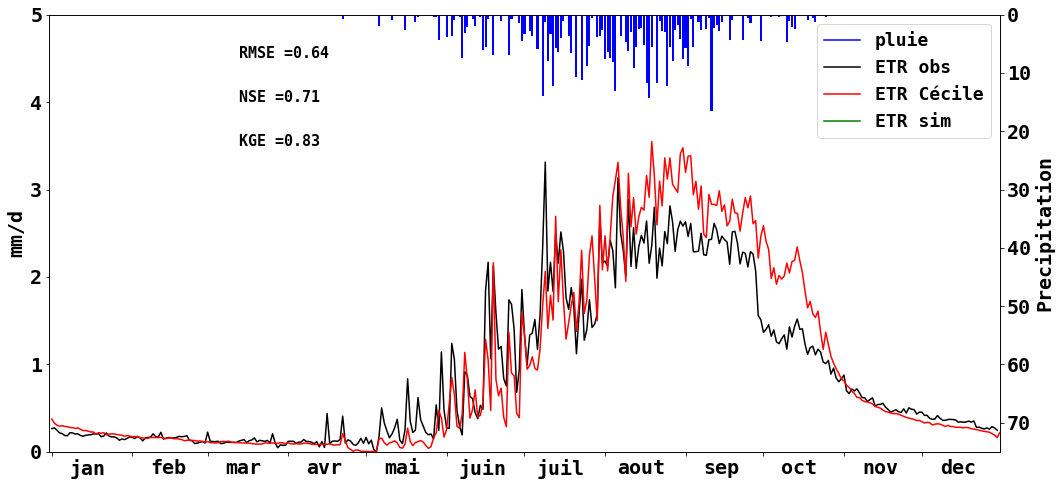

In [9]:


import matplotlib
from matplotlib import rc
from matplotlib.lines import Line2D

font_properties = {'family' : 'monospace',
  'weight' : 'bold',
  'size' : 15}
rc('font', **font_properties)

lai_mil = pd.read_csv(path_mil+'lai_mil_06_11.dat', delim_whitespace=True,header=None,\
                      index_col = None)

lai_mil = lai_mil.set_index(pd.date_range("2006-01-01 00:00:00",periods=lai_mil.shape[0],freq="30min"))

obs_en_mil['date'] = obs_en_mil.index
obs_en_mil = obs_en_mil.set_index(obs_en_mil['date'])

obs_en_mil['date'] = obs_en_mil.index
obs_en_mil = obs_en_mil.set_index(obs_en_mil['date'])

fig, ax = plt.subplots(figsize=(15,7),sharex=True)

ind = [i for i in range(366)]

month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['jan','feb','mar','avr','mai','juin',
               'juil','aout','sep','oct','nov','dec']

ev = obs_en_mil.ET.resample('D').sum()
sm = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()


handles, labels = plt.gca().get_legend_handles_labels()

pluie_j = (forc_mil['Precip'].resample('D').sum())*1800 

ax.plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index[:-1],obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean()[:-1],color='black')
ax.plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='red')
#ax.plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_1.evaptot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='green')
#ax.plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='orange')
#ax.plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='green')


ax1 = ax.twinx()

ax1.bar(pluie_j.groupby(obs_en_mil.date.dt.dayofyear).mean().index,pluie_j.groupby(obs_en_mil.date.dt.dayofyear).mean(),color='blue')
ax1.set_ylabel('Precipitation',fontsize=20, fontweight='bold')


ax.text(0.2,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax.transAxes)
ax.text(0.2,0.80,'NSE =%.2f'%he.nse(ev,sm),transform=ax.transAxes)
ax.text(0.2,0.70,'KGE =%.2f'%he.kge_2012(ev,sm),transform=ax.transAxes)


## legende manuelle

colors = ['blue','' 'black','red',"green" ]
lines = [Line2D([0], [0], color=c) for c in colors]
labels = ['pluie', 'ETR obs','ETR Cécile',"ETR sim"]
ax.legend(lines, labels,fontsize='large')


ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)
ax.set_ylabel("mm/d",fontsize=20, fontweight='bold')

ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax.axis(ymin = 0, ymax = 5, xmin = 0, xmax = 366)
ax1.axis(ymin = 75, ymax = 0)


#ax[0].set_title("ETR observée et simulée (mil)")

dx = 0.5 ; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for label in ax.xaxis.get_majorticklabels():
  label.set_transform(label.get_transform() + offset)

fig.tight_layout()

plt.show()


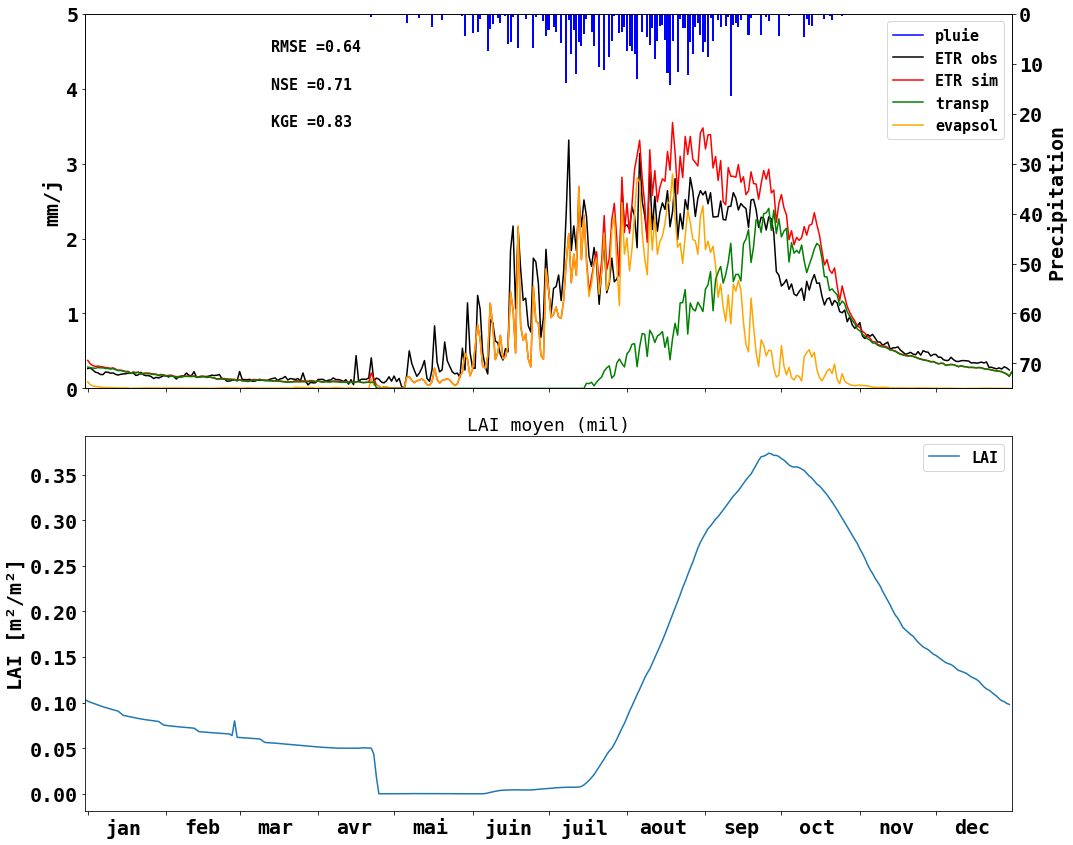

In [10]:


import matplotlib
from matplotlib import rc
from matplotlib.lines import Line2D

font_properties = {'family' : 'monospace',
  'weight' : 'bold',
  'size' : 15}
rc('font', **font_properties)

lai_mil = pd.read_csv(path_mil+'lai_mil_06_11.dat', delim_whitespace=True,header=None,\
                      index_col = None)

lai_mil = lai_mil.set_index(pd.date_range("2006-01-01 00:00:00",periods=lai_mil.shape[0],freq="30min"))

obs_en_mil['date'] = obs_en_mil.index
obs_en_mil = obs_en_mil.set_index(obs_en_mil['date'])

obs_en_mil['date'] = obs_en_mil.index
obs_en_mil = obs_en_mil.set_index(obs_en_mil['date'])

fig, ax = plt.subplots(2,1,figsize=(15,12),sharex=True)

ind = [i for i in range(366)]

month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['jan','feb','mar','avr','mai','juin',
               'juil','aout','sep','oct','nov','dec']

ev = obs_en_mil.ET.resample('D').sum()
sm = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()


handles, labels = plt.gca().get_legend_handles_labels()

pluie_j = (forc_mil['Precip'].resample('D').sum())*1800 

ax[0].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index[:-1],obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean()[:-1],color='black')
ax[0].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='red')
ax[0].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='orange')
ax[0].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean(),color='green')

ax[1].plot(ind,lai_mil[0].groupby([lai_mil.index.month, lai_mil.index.day]).mean())


ax1 = ax[0].twinx()

ax1.bar(pluie_j.groupby(obs_en_mil.date.dt.dayofyear).mean().index,pluie_j.groupby(obs_en_mil.date.dt.dayofyear).mean(),color='blue')
ax1.set_ylabel('Precipitation', fontsize=20,fontweight='bold' )


ax[0].text(0.2,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.2,0.80,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.2,0.70,'KGE =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)


## legende manuelle

colors = ['blue','' 'black','red' ,'green','orange']
lines = [Line2D([0], [0], color=c) for c in colors]
labels = ['pluie', 'ETR obs','ETR sim', 'transp','evapsol']
ax[0].legend(lines, labels)


ax[0].set_xticks(month_starts)
ax[0].set_xticklabels(month_names)
ax[0].set_ylabel("mm/j",fontsize=20, fontweight='bold')

ax[1].set_xticks(month_starts)
ax[1].set_xticklabels(month_names)
ax[1].set_ylabel("LAI [m²/m²]",fontsize=20, fontweight='bold')

ax[1].set_title("LAI moyen (mil)")

ax[1].legend(["LAI"])


ax[0].axis(ymin = 0, ymax = 5, xmin = 0, xmax = 366)
ax1.axis(ymin = 75, ymax = 0)

ax[0].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)




#ax[0].set_title("ETR observée et simulée (mil)")

dx = 0.5 ; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for label in ax[0].xaxis.get_majorticklabels():
  label.set_transform(label.get_transform() + offset)


for label in ax[1].xaxis.get_majorticklabels():
  label.set_transform(label.get_transform() + offset)

fig.tight_layout()

plt.show()


In [11]:
((etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum())

<xarray.DataArray 'evaptot' (time: 6)>
array([394.29567338, 283.32748955, 391.46349859, 382.86308342,
       360.24138664, 270.88981039])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [12]:
((etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum())

<xarray.DataArray 'evapsoil' (time: 6)>
array([219.26013242, 152.61152335, 175.21019165, 195.15992399,
       186.62363321, 138.96325925])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [13]:
((etr_mil3_2.trans.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum())

<xarray.DataArray 'trans' (time: 6)>
array([174.70600932, 130.55499451, 215.12017518, 186.46747027,
       172.07613516, 131.15482428])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [14]:
((etr_mil3_2.trans.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum())

<xarray.DataArray 'trans' (time: 6)>
array([174.70600932, 130.55499451, 215.12017518, 186.46747027,
       172.07613516, 131.15482428])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

## Humidités

In [15]:
obs_hum_mil = pd.read_csv(evaldir_mil + "hum_mil_obs_06_11.txt", delim_whitespace=True,\
 index_col = None,na_values= ['-9999.000','-6999.00000'])
obs_hum_mil.index = pd.date_range("2006-01-01 00:00:00", periods=obs_hum_mil.shape[0],freq='30min')
obs_hum_mil = obs_hum_mil.resample('D').mean()
obs_hum_mil=obs_hum_mil.loc['2006':'2011']


In [16]:
### HUMIDITES

## mil

mil_press = pression_mil(datadir_mil3_2,'press_mil_n3_2.nc')
mil_satur = saturation_mil(datadir_mil3_2,'satur_mil_n3_2.nc')


sim_mil = PFout.PFout(datadir_mil3_2,'plot_scale_mil')

with Dataset(outputdir_mil+'satur_mil_n3_2.nc', 'r') as ds:
    sim_mil.satur_array = np.transpose(ds.variables['satur'][:])

with Dataset(outputdir_mil+'press_mil_n3_2.nc', 'r') as ds:
    sim_mil.press_array = np.transpose(ds.variables['press'][:])

dz_mult_arr_mil,h_mil = PFB_read(glob.glob(os.path.join(datadir_mil3_2,'*dz_mult.pfb'))[0],1)
vdz_mil = dz_mult_arr_mil[0,0,:]

sim_mil.z = (np.cumsum(vdz_mil[:-3]) - vdz_mil[:-3]/2)*100


depths = np.zeros(len(sim_mil.z))

depths = [0,0.4,3,10,30,50,100,150,200,250]

zsim_ind = [np.argmin(abs(sim_mil.z-z)) for z in depths]
zsim = [sim_mil.z[zsim_ind]]

poro_mil,h_mil = PFB_read(glob.glob(os.path.join(datadir_mil3_2,'*poro*.pfb'))[0],1)


SM_mil=pd.DataFrame()

SM_mil['0'] = sim_mil.satur_array.data[zsim_ind[0]]*poro_mil[0,0,zsim_ind[0]]
SM_mil['0.4'] = sim_mil.satur_array.data[zsim_ind[1]]*poro_mil[0,0,zsim_ind[1]]
SM_mil['3'] = sim_mil.satur_array.data[zsim_ind[2]]*poro_mil[0,0,zsim_ind[2]]
SM_mil['8.75'] = sim_mil.satur_array.data[zsim_ind[3]]*poro_mil[0,0,zsim_ind[3]]
SM_mil['30'] = sim_mil.satur_array.data[zsim_ind[4]]*poro_mil[0,0,zsim_ind[4]]
SM_mil['48.65'] = sim_mil.satur_array.data[zsim_ind[5]]*poro_mil[0,0,zsim_ind[5]]
SM_mil['98.45'] = sim_mil.satur_array.data[zsim_ind[6]]*poro_mil[0,0,zsim_ind[6]]
SM_mil['154.2'] = sim_mil.satur_array.data[zsim_ind[7]]*poro_mil[0,0,zsim_ind[7]]
SM_mil['204.2'] = sim_mil.satur_array.data[zsim_ind[8]]*poro_mil[0,0,zsim_ind[8]]
SM_mil['254.2'] = sim_mil.satur_array.data[zsim_ind[9]]*poro_mil[0,0,zsim_ind[9]]

SM_mil.index=pd.date_range('1/1/2006 00:00:00', periods=SM_mil.shape[0], freq='D')
SM_mil['P']=(forc_mil['Precip']*30 * 60).resample('D').sum()





/home/tabsobam/.local/lib/python3.8/site-packages/HydroErr/HydroErr.py:6248: UserWarning: Row(s) [  83   84   85   86   87   88  109  110  111  112  113  114  115  116
  117  118  119  120  121  122  123  124  125  126  127  128  129  130
  131  132  133  134  135  136  137  138  139  140  141  142  143  144
  145  146  147  148  149  150  151  152  153  154  155  156  157  158
  159  160  161  162  163  164  165  166  167  168  170  171  172  173
  174  175  176  177  178  471  472  873  874  875  876  877  977  978
  979  980  981  982  983  984  986 1182 1183 1184 1185 1186 1412 1413
 1414 1415 1416 1417 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505
 1506 1507 1508 1509 1510 1511 1512 1513 1580 1581 1582 1583 1584 1585
 1586 1587 1588 1589 1590 1591 1592 1593 1664 1665 1666 1667 1668 1669
 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1774 1775
 1778 1779 1780 1781 1782 1818 1819 1820 1821 1822 1823 1824 1825 1826
 1827 1828 1829 1830 1833 1834 1835 1836 1837 1838 

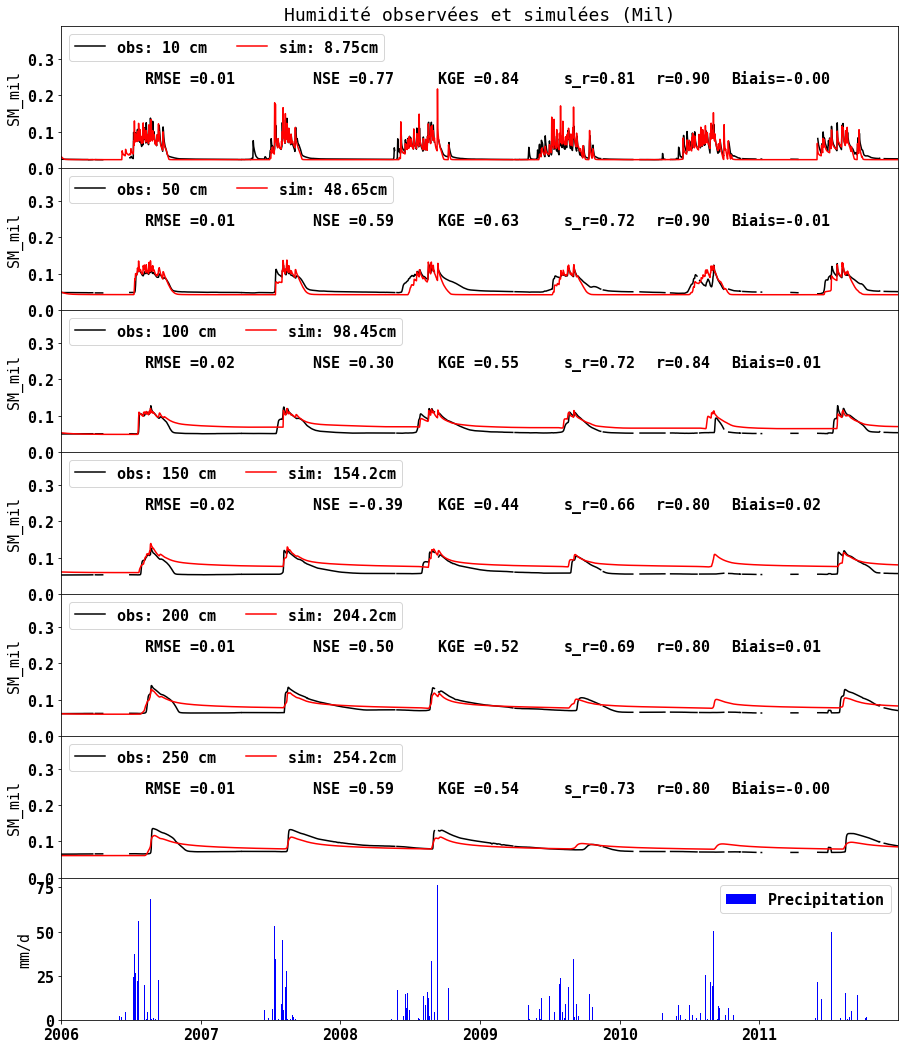

In [17]:
import datetime


obs_hum_mil.columns = ['10 cm','50 cm','100 cm','150 cm','200 cm','250 cm']

SM_mil1 = SM_mil.drop(['0','0.4','3','30'],axis=1)

fig,ax = plt.subplots(nrows=len(SM_mil1.columns),figsize=(15,15),sharex=True, squeeze=True)


for i in range(len(ax)):
  if (SM_mil1.columns[i] == 'P'):
    ax[i].bar(SM_mil1.index,SM_mil1[SM_mil1.columns[i]].values,width=1,facecolor='b')
    ax[i].legend(['Precipitation'])
    ax[i].set_ylabel('mm/d')
  else:
    evh = obs_hum_mil[obs_hum_mil.columns[i]]
    smh = SM_mil1[SM_mil1.columns[i]]
    ax[i].plot(obs_hum_mil[obs_hum_mil.columns[i]],'k')        
    ax[i].plot(SM_mil1[SM_mil1.columns[i]],'r')
    ax[i].legend([''.join(['obs: ',obs_hum_mil.columns[i]]),''.join(['sim: ',str(SM_mil1.columns[i]),'cm'])],loc='upper left',ncol = 2)
    ax[i].set_ylabel('SM_mil')
    ax[i].set_ylim([0, 0.39])   
    ax[i].set_xlim([datetime.datetime(2006,1,1), max(SM_mil1.index)])

    ax[i].text(0.6,0.60,'s_r=%.2f'%he.spearman_r(smh,evh),transform=ax[i].transAxes)
    ax[i].text(0.7,0.60,' r=%.2f'%he.pearson_r(smh,evh),transform=ax[i].transAxes)
    ax[i].text(0.8,0.60,'Biais=%.2f'%he.me(smh,evh),transform=ax[i].transAxes)

    ax[i].text(0.1,0.60,'RMSE =%.2f'%he.rmse(smh,evh),transform=ax[i].transAxes)
    ax[i].text(0.3,0.60,'NSE =%.2f'%he.nse(smh,evh),transform=ax[i].transAxes)
    ax[i].text(0.45,0.60,'KGE =%.2f'%he.kge_2012(smh,evh),transform=ax[i].transAxes)
    
    #ax[0].text(0.5,0.70,str(Ks = 0.00254),transform=ax[0].transAxes)
    #ax[0].text(0.7,0.70,'a1 = 2.64412',transform=ax[0].transAxes)
    #ax[0].text(0.9,0.70,'n1 = 1.54148',transform=ax[0].transAxes)

    #ax[0].text(0.5,0.70,'Ks=%.5f'%0.00254,transform=ax[i].transAxes)
    #ax[0].text(0.7,0.70,'a1=%.4f'%2.64412,transform=ax[i].transAxes)
    #ax[0].text(0.9,0.70,'n1=%.4f'%1.54148,transform=ax[i].transAxes)

    ax[0].set_title("Humidité observées et simulées (Mil)")



fig.subplots_adjust(bottom=0.03, top =0.95, hspace=0.001)

## Comparaison humidités

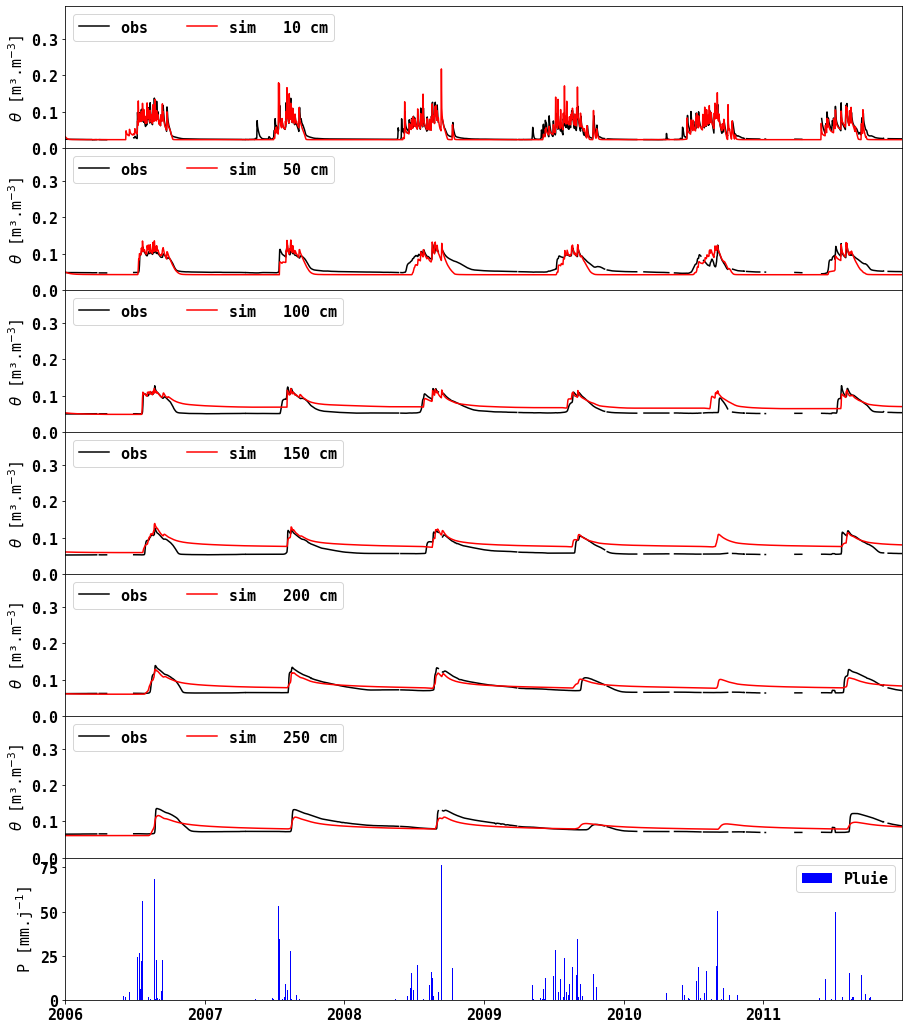

In [18]:
import datetime


obs_hum_mil.columns = ['10 cm','50 cm','100 cm','150 cm','200 cm','250 cm']

SM_mil1 = SM_mil.drop(['0','0.4','3','30'],axis=1)

fig,ax = plt.subplots(nrows=len(SM_mil1.columns),figsize=(15,15),sharex=True, squeeze=True)


for i in range(len(ax)):
  if (SM_mil1.columns[i] == 'P'):
    ax[i].bar(SM_mil1.index,SM_mil1[SM_mil1.columns[i]].values,width=1,facecolor='b')
    ax[i].legend(['Pluie'])
    ax[i].set_ylabel(r'P [mm.j$^{-1}$]')
  else:
    evh = obs_hum_mil[obs_hum_mil.columns[i]]
    smh = SM_mil1[SM_mil1.columns[i]]
    ax[i].plot(obs_hum_mil[obs_hum_mil.columns[i]],'k')        
    ax[i].plot(SM_mil1[SM_mil1.columns[i]],'r')
    #ax[i].legend(['obs','sim'],loc='upper left',ncol = 2)
    ax[i].legend(['obs ',''.join(['sim   ',str(obs_hum_mil.columns[i])])],loc='upper left',ncol = 2)
    ax[i].set_ylabel(r'$\theta$ [m³.m$^{-3}$]')
    ax[i].set_ylim([0, 0.39])   
    ax[i].set_xlim([datetime.datetime(2006,1,1), max(SM_mil1.index)])


    
    #ax[0].text(0.5,0.70,str(Ks = 0.00254),transform=ax[0].transAxes)
    #ax[0].text(0.7,0.70,'a1 = 2.64412',transform=ax[0].transAxes)
    #ax[0].text(0.9,0.70,'n1 = 1.54148',transform=ax[0].transAxes)

    #ax[0].text(0.5,0.70,'Ks=%.5f'%0.00254,transform=ax[i].transAxes)
    #ax[0].text(0.7,0.70,'a1=%.4f'%2.64412,transform=ax[i].transAxes)
    #ax[0].text(0.9,0.70,'n1=%.4f'%1.54148,transform=ax[i].transAxes)

    #ax[0].set_title("Humidité observées et simulées (Mil)")



fig.subplots_adjust(bottom=0.03, top =0.95, hspace=0.001)

## Profil racinaire

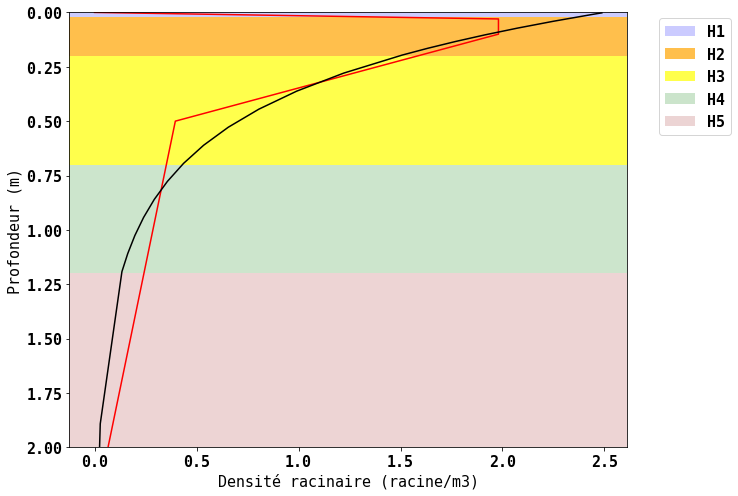

In [19]:
## Fonction racinaire d'origine

import numpy as np
import matplotlib.pyplot as plt

# Données de densité racinaire et de profondeur
cv_density = [0, 25000, 25000, 5000, 0]  # en nombre de racines par mètre cube
cv_depths = [0, 0.03, 0.1, 0.50, 2.3]   # en mètres

# Calcul des profondeurs
vdz = np.array([2.0e-03, 2.0e-03, 2.0e-03, 2.0e-03, 2.0e-03, 3.1e-02, 3.1e-02,
       3.1e-02, 3.1e-02, 3.1e-02, 3.1e-02, 8.3e-02, 8.3e-02, 8.3e-02,
       8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02,
       8.3e-02, 8.3e-02, 7.0e-01, 7.0e-01, 7.0e-01, 7.0e-01, 3.0e+00,
       3.0e+00, 2.0e+01])

#vdz = np.array([2.0e-02]*100)

z = np.cumsum(vdz) - vdz/2 
zi =  np.cumsum(vdz)
pf_depths = zi

# Calcul de la densité de racines de profil
#a = 8.6280
#roota = 9.6030
#b = 3.1280
roota = 3
rootb = 2

#rootb = 6.7000
pf_root = 0.5 * (roota*np.exp(-roota*pf_depths) + rootb*np.exp(-rootb*pf_depths))

# Tracé du profil de densité de racines
fig, ax = plt.subplots(figsize=(10,8))
area = np.trapz(cv_density, x=cv_depths, dx=0.001)
ax.plot(cv_density/area, cv_depths, 'r', label='Profil racinaire (Velluet)')

# Tracé du profil de densité de racines de profil
ax.plot(pf_root, pf_depths, 'k', label='Profil racinaire ajusté')
ax.set_xlabel('Densité racinaire (racine/m3)')
ax.set_ylim([0,2])
ax.set_ylabel('Profondeur (m)')

# Ajout d'une bande de couleur
ax.axhspan(0,0.02, facecolor='blue', alpha=0.2, linewidth=2)
ax.axhspan(0.02,0.2, facecolor='orange', alpha=0.7, linewidth=2)
ax.axhspan(0.2,0.7, facecolor='yellow', alpha=0.7, linewidth=2)
ax.axhspan(0.7,1.2, facecolor='green', alpha=0.2, linewidth=2)
ax.axhspan(1.2,2, facecolor='brown', alpha=0.2, linewidth=2)

handles = [plt.Rectangle((0,0),1,1,facecolor='blue', alpha=0.2),         
             plt.Rectangle((0,0),1,1,facecolor='orange', alpha=0.7),          
               plt.Rectangle((0,0),1,1,facecolor='yellow', alpha=0.7),     
                           plt.Rectangle((0,0),1,1,facecolor='green', alpha=0.2),       
                                   plt.Rectangle((0,0),1,1,facecolor='brown', alpha=0.2)]

labels = ['H1', 'H2', 'H3', 'H4', 'H5']

# Ajout d'une légende en dehors de la zone du graphique

ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.20, 0.70))



ax.invert_yaxis()


# Affichage du tracé   
plt.show()


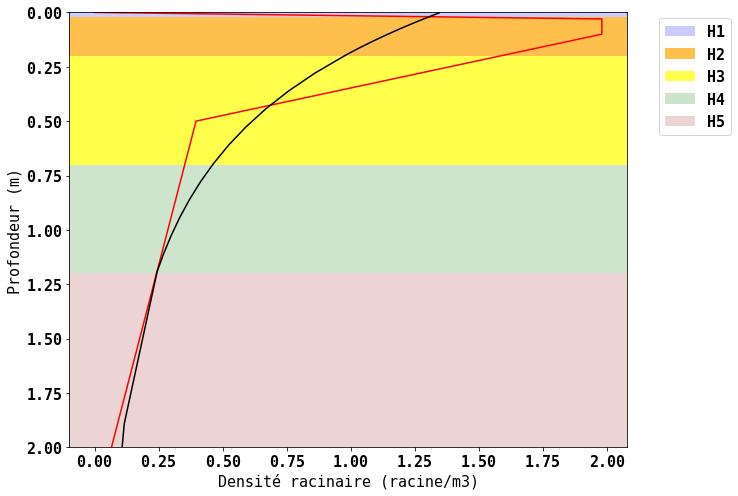

In [20]:
## Fonction racinaire LRH

import numpy as np
import matplotlib.pyplot as plt

# Données de densité racinaire et de profondeur
cv_density = [0, 25000, 25000, 5000, 0]  # en nombre de racines par mètre cube
cv_depths = [0, 0.03, 0.1, 0.50, 2.3]   # en mètres

# Calcul des profondeurs
vdz = np.array([2.0e-03, 2.0e-03, 2.0e-03, 2.0e-03, 2.0e-03, 3.1e-02, 3.1e-02,
       3.1e-02, 3.1e-02, 3.1e-02, 3.1e-02, 8.3e-02, 8.3e-02, 8.3e-02,
       8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02, 8.3e-02,
       8.3e-02, 8.3e-02, 7.0e-01, 7.0e-01, 7.0e-01, 7.0e-01, 3.0e+00,
       3.0e+00, 2.0e+01])

#vdz = np.array([2.0e-02]*100)

z = np.cumsum(vdz) - vdz/2 
zi =  np.cumsum(vdz)
pf_depths = zi

# Calcul de la densité de racines de profil
#a = 8.6280
#roota = 9.6030
#b = 3.1280
roota = 2
rootb = 0.7

#rootb = 6.7000
pf_root = 0.5 * (roota*np.exp(-roota*pf_depths) + rootb*np.exp(-rootb*pf_depths))

# Tracé du profil de densité de racines
fig, ax = plt.subplots(figsize=(10,8))
area = np.trapz(cv_density, x=cv_depths, dx=0.001)
ax.plot(cv_density/area, cv_depths, 'r', label='Profil racinaire (Velluet)')

# Tracé du profil de densité de racines de profil
ax.plot(pf_root, pf_depths, 'k', label='Profil racinaire ajusté')
ax.set_xlabel('Densité racinaire (racine/m3)')
ax.set_ylim([0,2])
ax.set_ylabel('Profondeur (m)')

# Ajout d'une bande de couleur
ax.axhspan(0,0.02, facecolor='blue', alpha=0.2, linewidth=2)
ax.axhspan(0.02,0.2, facecolor='orange', alpha=0.7, linewidth=2)
ax.axhspan(0.2,0.7, facecolor='yellow', alpha=0.7, linewidth=2)
ax.axhspan(0.7,1.2, facecolor='green', alpha=0.2, linewidth=2)
ax.axhspan(1.2,2, facecolor='brown', alpha=0.2, linewidth=2)

handles = [plt.Rectangle((0,0),1,1,facecolor='blue', alpha=0.2),         
             plt.Rectangle((0,0),1,1,facecolor='orange', alpha=0.7),          
               plt.Rectangle((0,0),1,1,facecolor='yellow', alpha=0.7),     
                           plt.Rectangle((0,0),1,1,facecolor='green', alpha=0.2),       
                                   plt.Rectangle((0,0),1,1,facecolor='brown', alpha=0.2)]

labels = ['H1', 'H2', 'H3', 'H4', 'H5']

# Ajout d'une légende en dehors de la zone du graphique

ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.20, 0.70))



ax.invert_yaxis()


# Affichage du tracé   
plt.show()


Geom.H1.Porosity.Value
0.358
Geom.H2.Porosity.Value
0.358
Geom.H3.Porosity.Value
0.321
Geom.H4.Porosity.Value
0.358
Geom.H5.Porosity.Value
0.34
Geom.H1.Porosity.Value
0.358
Geom.H1.Saturation.SRes
0.028
Geom.H1.Saturation.SSat
0.9
Geom.H1.Saturation.Alpha
1.43
Geom.H1.Saturation.N
1.95
Geom.H1.Perm.Value
0.0021
Geom.H2.Porosity.Value
0.358
Geom.H2.Saturation.SRes
0.064
Geom.H2.Saturation.SSat
0.9
Geom.H2.Saturation.Alpha
3.33
Geom.H2.Saturation.N
2
Geom.H2.Perm.Value
0.18
Geom.H3.Porosity.Value
0.321
Geom.H3.Saturation.SRes
0.13
Geom.H3.Saturation.SSat
0.9
Geom.H3.Saturation.Alpha
3.33
Geom.H3.Saturation.N
2
Geom.H3.Perm.Value
0.18
Geom.H4.Porosity.Value
0.358
Geom.H4.Saturation.SRes
0.09
Geom.H4.Saturation.SSat
0.9
Geom.H4.Saturation.Alpha
5
Geom.H4.Saturation.N
2
Geom.H4.Perm.Value
0.18
Geom.H5.Porosity.Value
0.34
Geom.H5.Saturation.SRes
0.16
Geom.H5.Saturation.SSat
0.9
Geom.H5.Saturation.Alpha
5
Geom.H5.Saturation.N
2
Geom.H5.Perm.Value
0.18


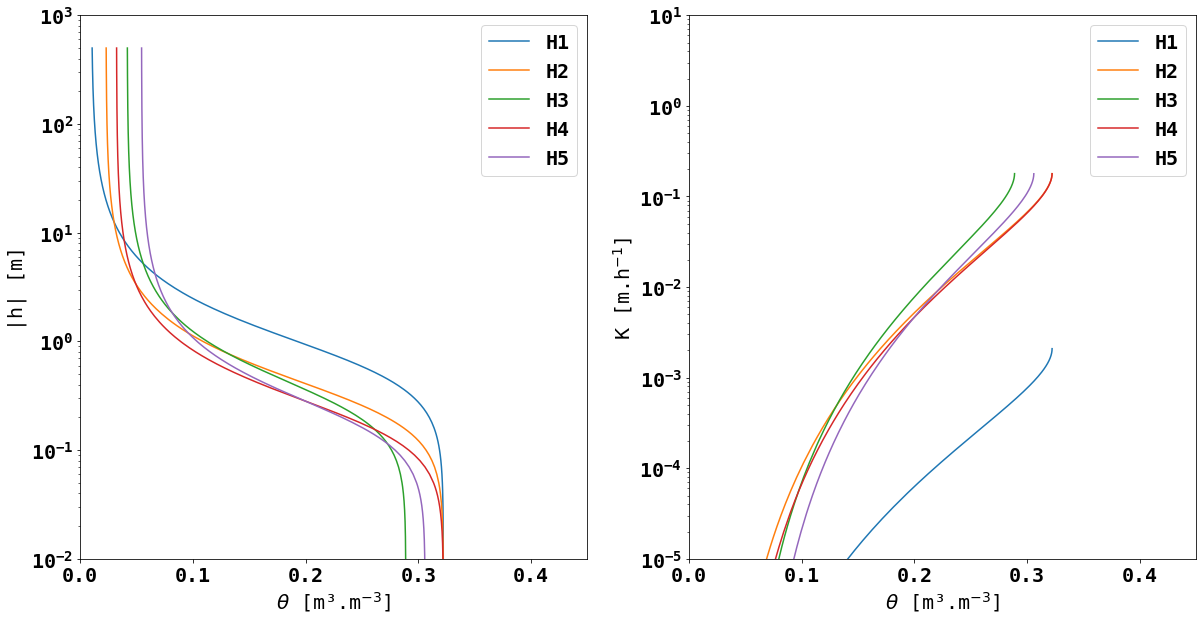

In [21]:
## Courbe de retention

from PFlibs import VGM

#tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new_step3_mil/sim_400/SA_mil_400.tcl'
tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/mil_c_1d_spinup.tcl'



#tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_mil_step1/sim_2/SA_mil_2.tcl'

#tcl_file = datadir_mil3_2 + 'mil_c_1d.tcl'


#tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new_3H_mil/sim_34/SA_mil_34.tcl'

#tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/PF_SA_mil/results/simus_params_LH_new/sim_337/SA_mil_337.tcl'



v = VGM.VGMps()
v=v.populate_from_tcl(tcl_file)
v.plot_hth_Kh()

In [22]:
## Courbe de retention

'''
from PFlibs import VGM
import os

def create_path(folder):
    # Récupérer la liste des fichiers dans le dossier
    files = os.listdir(folder)
    
    # Rechercher un fichier avec l'extension spécifiée
    for file in files:
        #if file.endswith(extension):
        if file.startswith('SA_mil') and file.endswith('.tcl'):
            # Construire le chemin complet en utilisant le dossier et le fichier
            path = os.path.join(folder, file)
            return path
    
    # Si aucun fichier correspondant n'est trouvé, retourner None ou une valeur par défaut
    return None


#tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/mil_c_1d_def.tcl'



v = VGM.VGMps()
v=v.populate_from_tcl(create_path(datadir_mil3_2))
v.plot_hth_Kh()

'''


"\nfrom PFlibs import VGM\nimport os\n\ndef create_path(folder):\n    # Récupérer la liste des fichiers dans le dossier\n    files = os.listdir(folder)\n    \n    # Rechercher un fichier avec l'extension spécifiée\n    for file in files:\n        #if file.endswith(extension):\n        if file.startswith('SA_mil') and file.endswith('.tcl'):\n            # Construire le chemin complet en utilisant le dossier et le fichier\n            path = os.path.join(folder, file)\n            return path\n    \n    # Si aucun fichier correspondant n'est trouvé, retourner None ou une valeur par défaut\n    return None\n\n\n#tcl_file = r'/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/mil_c_1d_def.tcl'\n\n\n\nv = VGM.VGMps()\nv=v.populate_from_tcl(create_path(datadir_mil3_2))\nv.plot_hth_Kh()\n\n"

In [23]:
SM_mil['0.3'] = sim_mil.satur_array.data[zsim_ind[1]]*poro_mil[0,0,zsim_ind[1]]
#SM_mil['0.5'] = sim_mil.satur_array.data[zsim_ind[1]]*poro_mil[0,0,zsim_ind[1]]
SM_mil['0.7'] = sim_mil.satur_array.data[zsim_ind[2]]*poro_mil[0,0,zsim_ind[2]]


lai_mil = pd.read_csv(path_mil+'lai_mil_06_11.dat', delim_whitespace=True,header=None,\
                      index_col = None)

lai_mil =lai_mil.set_index(pd.date_range("2006-01-01 00:00:00",periods=lai_mil.shape[0],freq="30min"))
lai_mil=lai_mil.loc['2006':'2009']

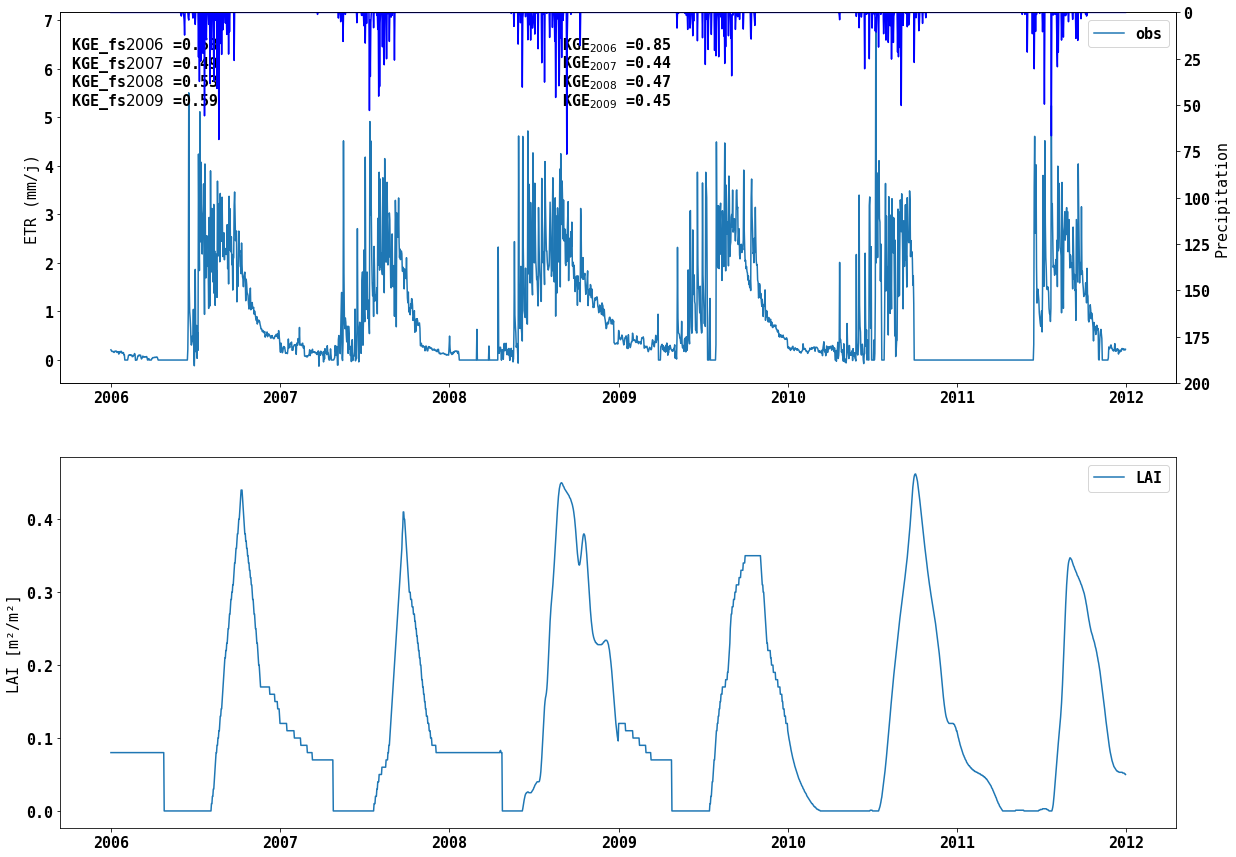

In [24]:


lai_m= pd.read_csv(path_mil+'pheno_mil_cecile_2005_2012_j.txt', delim_whitespace=True,header=None,\
 index_col = None, names=['lai','sai','hveg'])

lai_m=lai_m.set_index(pd.date_range("2005-01-01","2012-12-31",freq="D"))

lai_m = lai_m['lai'].loc['2006':'2011']



import matplotlib

obs_en_mil['date'] = obs_en_mil.index
obs_en_mil = obs_en_mil.set_index(obs_en_mil['date'])


fig, ax = plt.subplots(2,1,figsize=(20,15))

ind = [i for i in range(366)]


ev = obs_en_mil.ET.resample('D').sum()
sm = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()

#ev = ev = obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean()[121:197]

#sm = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean()[121:197]


#ev2 = obs_en_mil.ET.resample('D').sum()
#sm2 = etr_mil3_21.evaptot.mean(dim='y').resample(time='D').sum()

ev2006 = obs_en_mil.ET.resample('D').sum().loc['2006'][121:197]
ev2007 = obs_en_mil.ET.resample('D').sum().loc['2007'][121:197]
ev2008 = obs_en_mil.ET.resample('D').sum().loc['2008'][121:197]
ev2009 = obs_en_mil.ET.resample('D').sum().loc['2009'][121:197]


ev2006_fs = obs_en_mil.ET.resample('D').sum().loc['2006'][305:365]
ev2007_fs = obs_en_mil.ET.resample('D').sum().loc['2007'][305:365]
ev2008_fs = obs_en_mil.ET.resample('D').sum().loc['2008'][305:365]
ev2009_fs = obs_en_mil.ET.resample('D').sum().loc['2009'][305:365]



sm2006_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2006')[305:365]
sm2007_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2007')[305:365]
sm2008_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2008')[305:365]
sm2009_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2009')[305:365]


sm2006 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2006')[121:197]
sm2007 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2007')[121:197]
sm2008 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2008')[121:197]
sm2009 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2009')[121:197]

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.90,'KGE$_{2006}$ =%.2f'%he.kge_2012(sm2006,ev2006),transform=ax[0].transAxes)
ax[0].text(0.01,0.90,'KGE_fs${2006}$ =%.2f'%he.kge_2012(sm2006_fs,ev2006_fs),transform=ax[0].transAxes)


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.85,'KGE$_{2007}$ =%.2f'%he.kge_2012(sm2007,ev2007),transform=ax[0].transAxes)
ax[0].text(0.01,0.85,'KGE_fs${2007}$ =%.2f'%he.kge_2012(sm2007_fs,ev2007_fs),transform=ax[0].transAxes)


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.80,'KGE$_{2008}$ =%.2f'%he.kge_2012(sm2008,ev2008),transform=ax[0].transAxes)
ax[0].text(0.01,0.80,'KGE_fs${2008}$ =%.2f'%he.kge_2012(sm2008_fs,ev2008_fs),transform=ax[0].transAxes)


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.75,'KGE$_{2009}$ =%.2f'%he.kge_2012(sm2009,ev2009),transform=ax[0].transAxes)
ax[0].text(0.01,0.75,'KGE_fs${2009}$ =%.2f'%he.kge_2012(sm2009_fs,ev2009_fs),transform=ax[0].transAxes)



ax[0].plot(obs_en_mil.ET.resample('D').sum().index, obs_en_mil.ET.resample('D').sum())

ax1 = ax[0].twinx()

ax1.plot(pluie_j.index, pluie_j, color='blue')
ax1.set_ylabel('Precipitation')
ax1.set_ylim(0, 200)

ax1.invert_yaxis()

#ax[0].plot(obs_en_mil.ET.resample('D').sum().index,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum())
#ax[0].plot(obs_en_mil.ET.resample('D').sum().index,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum())
#ax[0].plot(obs_en_mil.ET.resample('D').sum().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum())


#ax[1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean())

ax[1].plot(obs_en_mil.ET.resample('D').sum().index,lai_m)

#ax[1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean())
#ax[1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean())

#ax[0][1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,lai_mil.groupby([lai_mil.index.month, lai_mil.index.day]).mean())


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.90,'KGE$_{2006}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.85,'KGE$_{2007}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.80,'KGE$_{2008}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.75,'KGE$_{2009}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].legend(["obs","sim","evap","trans"])
#ax[1].legend(["obs","evapo","transpiration"])


ax[0].legend(["obs","sim","evapsol","transp"])

ax[1].legend(["LAI"])

ax[0].set_ylabel("ETR (mm/j)")

ax[1].set_ylabel("LAI [m²/m²]")

#ax[0].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5))




#ax[0].axis(ymin = 0, ymax = 4, xmin = 0, xmax = 366)
#ax[1].axis(ymin = 0, ymax = 0.5, xmin = 0, xmax = 366)


a = plt.gca()

#fig.tight_layout()



/home/tabsobam/.local/lib/python3.8/site-packages/HydroErr/HydroErr.py:3250: RuntimeWarning: invalid value encountered in double_scalars
  pr = top_pr / (bot1_pr * bot2_pr)
/home/tabsobam/.local/lib/python3.8/site-packages/HydroErr/HydroErr.py:3253: RuntimeWarning: divide by zero encountered in double_scalars
  beta = sim_mean / obs_mean
/home/tabsobam/.local/lib/python3.8/site-packages/HydroErr/HydroErr.py:3257: RuntimeWarning: invalid value encountered in double_scalars
  obs_cv = obs_sigma / obs_mean
/home/tabsobam/.local/lib/python3.8/site-packages/HydroErr/HydroErr.py:3267: UserWarning: Warning: The observed data mean is 0. Therefore, Beta is infinite and the KGE value cannot be computed.
  warnings.warn(
/home/tabsobam/.local/lib/python3.8/site-packages/HydroErr/HydroErr.py:3271: UserWarning: Warning: The observed data standard deviation is 0. Therefore, Gamma is infinite and the KGE value cannot be computed.
  warnings.warn(


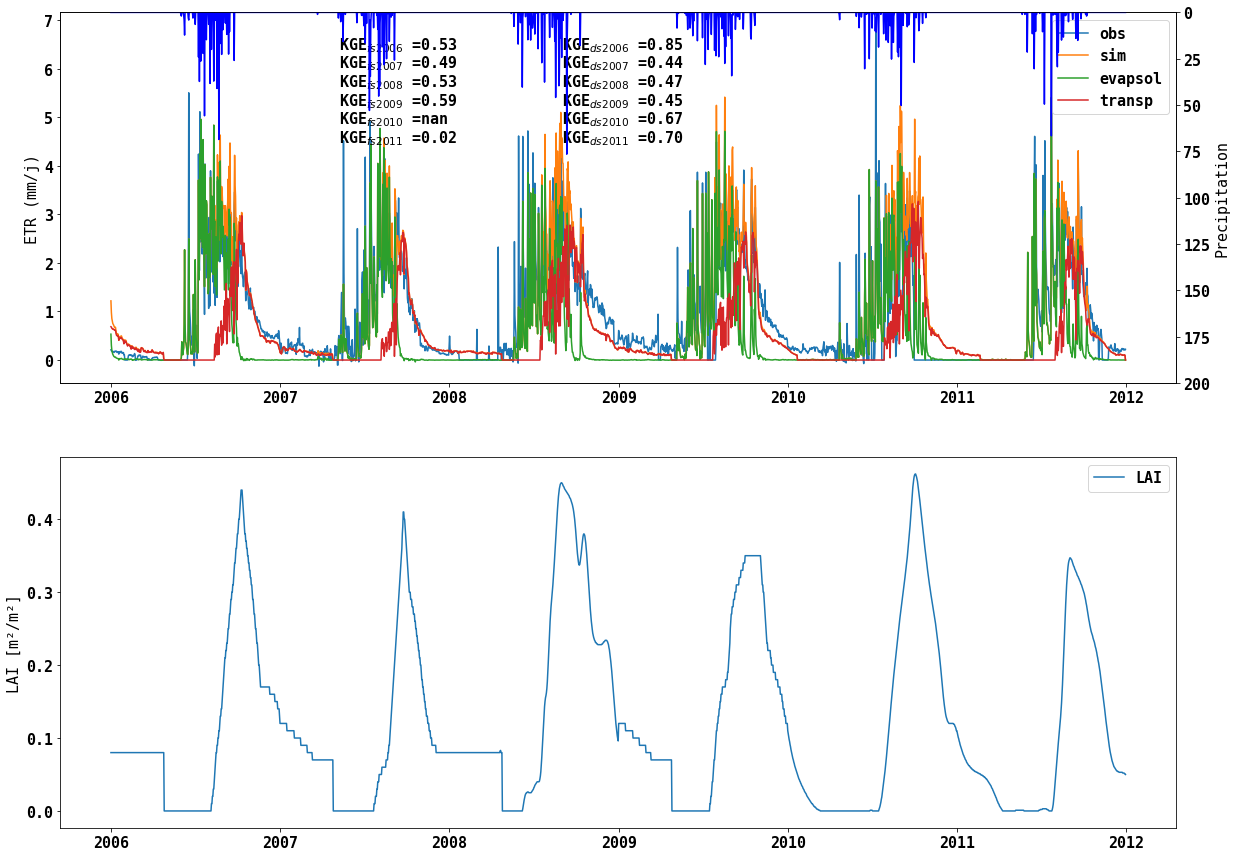

In [25]:


lai_m= pd.read_csv(path_mil+'pheno_mil_cecile_2005_2012_j.txt', delim_whitespace=True,header=None,\
 index_col = None, names=['lai','sai','hveg'])

lai_m=lai_m.set_index(pd.date_range("2005-01-01","2012-12-31",freq="D"))

lai_m = lai_m['lai'].loc['2006':'2011']



import matplotlib

obs_en_mil['date'] = obs_en_mil.index
obs_en_mil = obs_en_mil.set_index(obs_en_mil['date'])


fig, ax = plt.subplots(2,1,figsize=(20,15))

ind = [i for i in range(366)]


ev = obs_en_mil.ET.resample('D').sum()
sm = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()

#ev = ev = obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean()[121:197]

#sm = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean()[121:197]


#ev2 = obs_en_mil.ET.resample('D').sum()
#sm2 = etr_mil3_21.evaptot.mean(dim='y').resample(time='D').sum()

ev2006 = obs_en_mil.ET.resample('D').sum().loc['2006'][121:197]
ev2007 = obs_en_mil.ET.resample('D').sum().loc['2007'][121:197]
ev2008 = obs_en_mil.ET.resample('D').sum().loc['2008'][121:197]
ev2009 = obs_en_mil.ET.resample('D').sum().loc['2009'][121:197]
ev2010 = obs_en_mil.ET.resample('D').sum().loc['2010'][121:197]
ev2011 = obs_en_mil.ET.resample('D').sum().loc['2011'][121:197]



ev2006_fs = obs_en_mil.ET.resample('D').sum().loc['2006'][305:365]
ev2007_fs = obs_en_mil.ET.resample('D').sum().loc['2007'][305:365]
ev2008_fs = obs_en_mil.ET.resample('D').sum().loc['2008'][305:365]
ev2009_fs = obs_en_mil.ET.resample('D').sum().loc['2009'][305:365]
ev2010_fs = obs_en_mil.ET.resample('D').sum().loc['2010'][305:365]
ev2011_fs = obs_en_mil.ET.resample('D').sum().loc['2011'][305:365]




sm2006_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2006')[305:365]
sm2007_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2007')[305:365]
sm2008_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2008')[305:365]
sm2009_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2009')[305:365]
sm2010_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2010')[305:365]
sm2011_fs = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2011')[305:365]


sm2006 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2006')[121:197]
sm2007 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2007')[121:197]
sm2008 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2008')[121:197]
sm2009 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2009')[121:197]
sm2010 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2010')[121:197]
sm2011 = etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum().sel(time='2011')[121:197]


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.90,'KGE$_{ds2006}$ =%.2f'%he.kge_2012(sm2006,ev2006),transform=ax[0].transAxes)
ax[0].text(0.25,0.90,'KGE$_{fs2006}$ =%.2f'%he.kge_2012(sm2006_fs,ev2006_fs),transform=ax[0].transAxes)


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.85,'KGE$_{ds2007}$ =%.2f'%he.kge_2012(sm2007,ev2007),transform=ax[0].transAxes)
ax[0].text(0.25,0.85,'KGE$_{fs2007}$ =%.2f'%he.kge_2012(sm2007_fs,ev2007_fs),transform=ax[0].transAxes)


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.80,'KGE$_{ds2008}$ =%.2f'%he.kge_2012(sm2008,ev2008),transform=ax[0].transAxes)
ax[0].text(0.25,0.80,'KGE$_{fs2008}$ =%.2f'%he.kge_2012(sm2008_fs,ev2008_fs),transform=ax[0].transAxes)


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)
ax[0].text(0.45,0.75,'KGE$_{ds2009}$ =%.2f'%he.kge_2012(sm2009,ev2009),transform=ax[0].transAxes)
ax[0].text(0.25,0.75,'KGE$_{fs2009}$ =%.2f'%he.kge_2012(sm2009_fs,ev2009_fs),transform=ax[0].transAxes)

ax[0].text(0.45,0.70,'KGE$_{ds2010}$ =%.2f'%he.kge_2012(sm2010,ev2010),transform=ax[0].transAxes)
ax[0].text(0.25,0.70,'KGE$_{fs2010}$ =%.2f'%he.kge_2012(sm2010_fs,ev2010_fs),transform=ax[0].transAxes)

ax[0].text(0.45,0.65,'KGE$_{ds2011}$ =%.2f'%he.kge_2012(sm2011,ev2011),transform=ax[0].transAxes)
ax[0].text(0.25,0.65,'KGE$_{fs2011}$ =%.2f'%he.kge_2012(sm2011_fs,ev2011_fs),transform=ax[0].transAxes)



ax[0].plot(obs_en_mil.ET.resample('D').sum().index, obs_en_mil.ET.resample('D').sum())

ax1 = ax[0].twinx()

ax1.plot(pluie_j.index, pluie_j, color='blue')
ax1.set_ylabel('Precipitation')
ax1.set_ylim(0, 200)

ax1.invert_yaxis()

ax[0].plot(obs_en_mil.ET.resample('D').sum().index,etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum())
ax[0].plot(obs_en_mil.ET.resample('D').sum().index,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum())
ax[0].plot(obs_en_mil.ET.resample('D').sum().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum())


#ax[1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean())

ax[1].plot(obs_en_mil.ET.resample('D').sum().index,lai_m)

#ax[1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean())
#ax[1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,etr_mil3_2.trans.mean(dim='y').resample(time='D').sum().groupby('time.dayofyear').mean())

#ax[0][1].plot(obs_en_mil.ET.resample('D').sum().groupby(obs_en_mil.date.dt.dayofyear).mean().index,lai_mil.groupby([lai_mil.index.month, lai_mil.index.day]).mean())


#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.90,'KGE$_{2006}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.85,'KGE$_{2007}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.80,'KGE$_{2008}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.05,0.90,'RMSE =%.2f'%he.rmse(ev,sm),transform=ax[0].transAxes)
#ax[0].text(0.4,0.90,'NSE =%.2f'%he.nse(ev,sm),transform=ax[0].transAxes)

#ax[0].text(0.01,0.75,'KGE$_{2009}$ =%.2f'%he.kge_2012(ev,sm),transform=ax[0].transAxes)

#ax[0].legend(["obs","sim","evap","trans"])
#ax[1].legend(["obs","evapo","transpiration"])


ax[0].legend(["obs","sim","evapsol","transp"])

ax[1].legend(["LAI"])

ax[0].set_ylabel("ETR (mm/j)")

ax[1].set_ylabel("LAI [m²/m²]")

#ax[0].legend(loc='upper right', bbox_to_anchor=(0.5, 0.5))




#ax[0].axis(ymin = 0, ymax = 4, xmin = 0, xmax = 366)
#ax[1].axis(ymin = 0, ymax = 0.5, xmin = 0, xmax = 366)


a = plt.gca()

#fig.tight_layout()



## BILAN

In [27]:
## Calcul de la variation de stock

## mil
poro_mil,h_mil = PFB_read(glob.glob(os.path.join(datadir_mil3_2,'*poro*.pfb'))[0],1)
specstor_mil,h=PFB_read(glob.glob(os.path.join(datadir_mil3_2,'*specific*.pfb'))[0],1)
dz_mult_arr_mil,h_mil = PFB_read(glob.glob(os.path.join(datadir_mil3_2,'*dz_mult.pfb'))[0],1)
vdz_mil = dz_mult_arr_mil[0,0,:]

dz_mult_arr_mil.shape


nt_mil = sim_mil.satur_array.shape[-1]

stock_mil = np.zeros([nt_mil])
for t in range(nt_mil):
    # underground storage
    stock_mil[t] = (h['dx']*h['dy']*h['dz']*dz_mult_arr_mil[0,0,:]*poro_mil[0,0,:]*sim_mil.satur_array[:,t]).sum(axis=0)
    # poroelastic storage
    tmp1_mil = (h['dx']*h['dy']*h['dz']*dz_mult_arr_mil[0,0,:]*specstor_mil[0,0,:]*sim_mil.satur_array[:,t]*sim_mil.press_array[:,t])
    #~ tmp[tmp<0]=0.
    stock_mil[t]+=tmp1_mil.sum(axis=0)
    # surface storage
    tmp2_mil = h['dx']*h['dy']*sim_mil.press_array[0,t]
    if tmp2_mil<0: tmp2_mil=0
    stock_mil[t]+=tmp2_mil
    
stock_mil = stock_mil * 1000/h['dx']/h['dy']
stock_mil = stock_mil-stock_mil[0]
#stock_mil = stock_mil[1::]
stock_mil = pd.Series(stock_mil)
#stock_mil.index=pd.date_range('1/1/2005 00:00:00', periods=nt-1, freq='D')
stock_mil.index=pd.date_range('1/1/2006 00:00:00', periods=nt_mil, freq='D')

stock_mil = stock_mil.sort_index()
#stock_mil.plot()



## Ruissellement

mil_runoff = lire_debit(datadir_mil3_2,'*overlandsum.*.pfb')


#mil_runoff.plot()

#mil_runoff.plot()

<string>:624: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


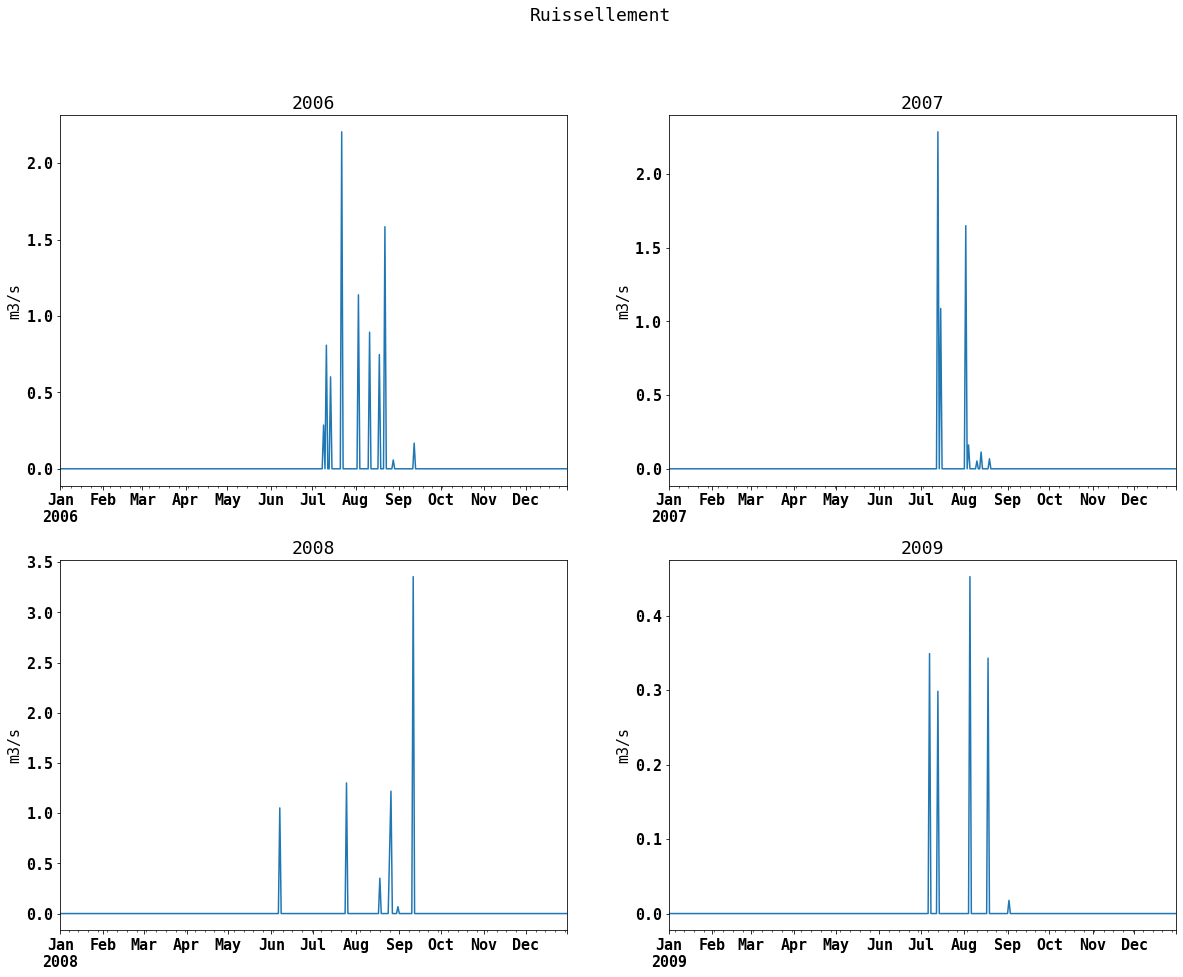

In [29]:
import matplotlib.pyplot as plt

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Tracé des données pour chaque année sur le sous-graphique correspondant
mil_runoff.loc['2006'].plot(ax=axes[0, 0], title='2006')
mil_runoff.loc['2007'].plot(ax=axes[0, 1], title='2007')
mil_runoff.loc['2008'].plot(ax=axes[1, 0], title='2008')
mil_runoff.loc['2009'].plot(ax=axes[1, 1], title='2009')



# Titre général
fig.suptitle('Ruissellement')

#ax[0].set_ylabel('m3/s')

axes[0,0].set_ylabel("m3/s")
axes[0,1].set_ylabel("m3/s")
axes[1,0].set_ylabel("m3/s")
axes[1,1].set_ylabel("m3/s")



# Affichage du tracé
plt.show()


In [30]:
### ETR avec evaptranssum --- Mil
n_coupled_layers = 25

"""identify files"""
files = glob.glob(os.path.join(datadir_mil3_2,'*evaptranssum.*.pfb'))
files.sort()
"""reads in the first file to have the dimension & initialize"""
d,h=PFB_read(files[0],1)
ETsum = pd.Series(index=pd.date_range("2006-01-01", periods=len(files)))
"""reads in all files"""
for t,f in enumerate(files):
    d,h=PFB_read(f,1)
    tmp = np.zeros([h['ny']])
    for k in range(n_coupled_layers):
        tmp+=d[0,0,k]*vdz_mil[k] ##################" verifier orientation de vdz_mil
    ETsum.iloc[t] = np.mean(tmp)
print(d[0,0,:])
ETsum

""" correction de l'ET """
ETsum = ETsum*1000/h['dx']/h['dy'] #m3 -> mm
ET_sim_mil = -(ETsum -(forc_mil['Precip']*30 * 60).resample('D').sum())

#ET_sim_mil.dropna().plot()

/tmp/ipykernel_40387/722505426.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ETsum = pd.Series(index=pd.date_range("2006-01-01", periods=len(files)))


[-0.01926794  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


In [31]:
## mil 

Q_mil = mil_runoff* 1000/h['dx']/h['dy']/h['ny']
Budg_mil = pd.DataFrame({'Rainfall':(forc_mil['Precip']*30 * 60).resample('Y').sum()
  ,'ETR':ET_sim_mil.resample('Y').sum(),'Runoff':Q_mil.resample('Y').sum(),'Storage':np.nan})
for i, y in enumerate(np.sort(stock_mil.index.year.unique())):
    if i ==0:
        Budg_mil['Storage'][Budg_mil.index.year==y] = stock_mil[stock_mil.index.year==y][-1]
    else:
        Budg_mil['Storage'][Budg_mil.index.year==y] = stock_mil[stock_mil.index.year==y][-1] - stock_mil[stock_mil.index.year==y-1][-1] 
Budg_mil.index=Budg_mil.index.year
Budg_mil['Drainage'] = Budg_mil['Rainfall']- Budg_mil['ETR']-Budg_mil['Runoff']-Budg_mil['Storage']
#Budg_mil = Budg_mil.rename(columns={"P": "Rainfall", "ET": "Evapotranspiration","Q": "Runoff","WSC": "Storage","D": "Drainage"})
Budg_mil





Rainfall         ETR     Runoff    Storage   Drainage
2006    580.68  394.906107  84.914528  86.909594  13.949772
2007    424.80  284.688413  54.170491  55.451368  30.489728
2008    555.66  392.849883  79.555969  14.448999  68.805149
2009    434.16  383.718123  14.615627 -38.738919  74.565169
2010    428.40  360.497618  39.099964 -15.356072  44.158490
2011    354.60  271.874655  35.604976  12.027407  35.092961

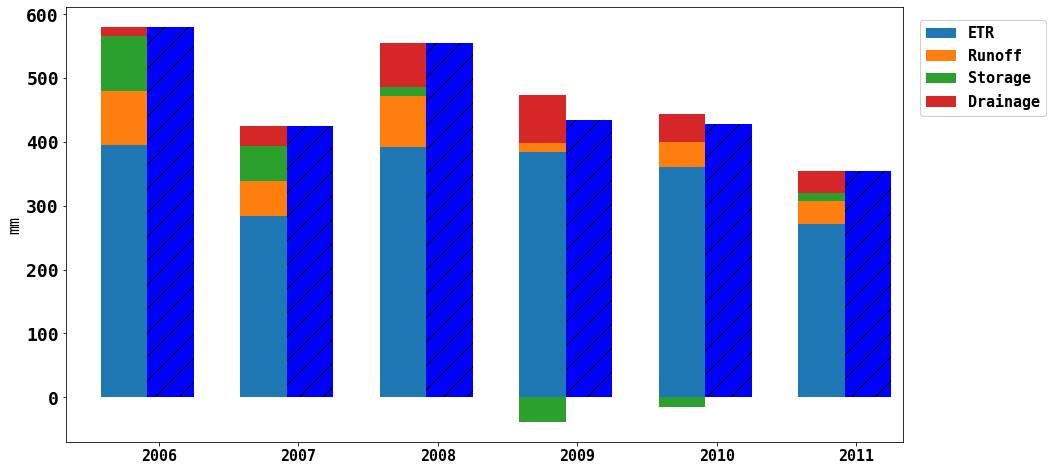

In [33]:
ax1 = plot_bilan([Budg_mil.loc[:,['ETR','Runoff','Storage','Drainage']],Budg_mil['Rainfall']])
ax1.set_ylabel('mm')
ax1.tick_params(axis='y', labelsize='large')
#ax1.set_title("Bilan mil")

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_bilan(dfall, labels=None, H="/", fontsize='large', **kwargs):
    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    fig = plt.figure(figsize=(15,8))
    axe = fig.add_subplot(111)

    for df in dfall:
        if isinstance(df, pd.DataFrame):
            axe = df.plot(kind="bar",
                          linewidth=0,
                          stacked=True,
                          ax=axe,
                          legend=False,
                          grid=False,
                          **kwargs)
        else:
            axe = df.plot(kind="bar",
                          linewidth=0,
                          stacked=True,
                          ax=axe,
                          legend=False,
                          grid=False,
                          color='b',
                          **kwargs)

    h, l = axe.get_legend_handles_labels()
    for i in range(0, n_df * n_col, n_col):
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches:
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col))
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation=0)

    n = []
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.02, 0.75], fontsize=fontsize)
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    axe.add_artist(l1)
    return axe


Text(0, 0.5, 'mm')

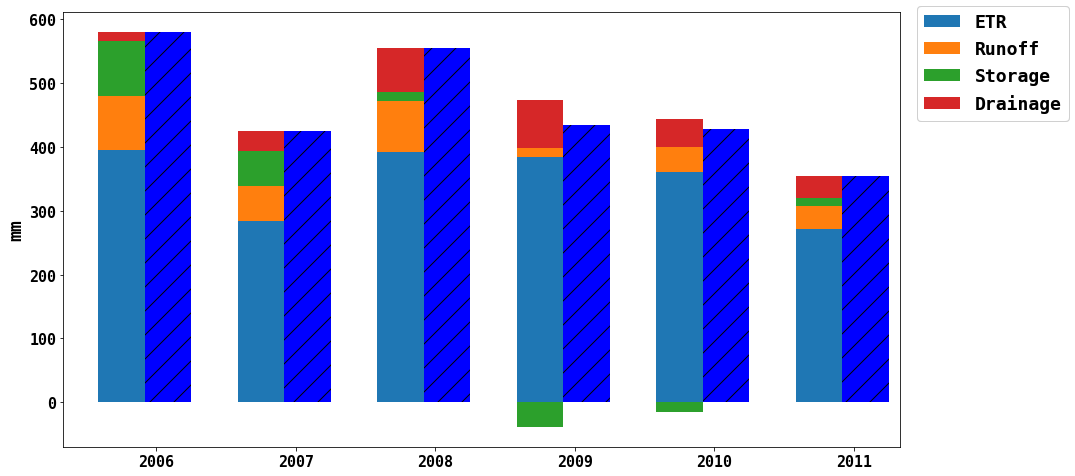

In [35]:
ax1 = plot_bilan([Budg_mil.loc[:,['ETR','Runoff','Storage','Drainage']],Budg_mil['Rainfall']])
ax1.set_ylabel('mm',fontsize=18,fontweight='bold')
#ax1.set_title("Bilan mil")

In [36]:
## Coefficients de ruissellement

coef_runoff_mil = pd.DataFrame({'Cr':round((Budg_mil['Runoff']/ Budg_mil['Rainfall'])*100,3)})
coef_runoff_mil

Cr
2006  14.623
2007  12.752
2008  14.317
2009   3.366
2010   9.127
2011  10.041

## Verification runoff (fonction LR)

In [37]:
wdir = datadir_mil3_2

In [38]:


from glob import glob
import numpy as np
import os,glob,struct
import xarray as xr
import pandas as pd
import datetime as dt
#import hydrostats as hs
#import hydrostats.data as hd
#import hydrostats.visual as hv
from matplotlib import pyplot as plt
import HydroErr as he
import math
import scipy.io as sp
#import logging
#import PFlibs 
from PFlibs import PFoutputs as PFout
from netCDF4 import Dataset
from PFlibs import VGM
import numpy as np
import os,glob,struct
import xarray as xr
import pandas as pd
import datetime as dt

from parflow import read_pfb, read_pfb_sequence, ParflowBinaryReader
from parflow import Run

In [39]:


def read_and_process_pf_outputs(wdir,date_start="2006-01-01"):
    
    with ParflowBinaryReader(glob.glob(wdir+'*.press.00000.pfb')[0]) as s: h = s.header

    # get z
    var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])
    var_dz_vec = var_dz[:,0,0]
    var_dz_vec = var_dz_vec[::-1]
    dz = var_dz_vec * h['dz']
    z = np.cumsum(dz) - var_dz_vec/2

    # get pressure (pop(0) skips initial condition)
    files = np.sort(glob.glob(wdir+'*.press.*.pfb'))[1::]
    press = read_pfb_sequence(files)
    # get saturation
    files = np.sort(glob.glob(wdir+'*.satur.*.pfb'))[1::]
    satur = read_pfb_sequence(files)
    # get evaptranssum
    files = np.sort(glob.glob(wdir+'*.evaptranssum.*.pfb'))
    evaptranssum = read_pfb_sequence(files)
    # get overlandsum
    files = np.sort(glob.glob(wdir+'*.overlandsum.*.pfb'))
    overlandsum = read_pfb_sequence(files)
        
    # create dataset
    ds = xr.Dataset({"press": (("time","z","y"), press[:,::-1,:,0]),
                    "satur": (("time","z","y"), satur[:,::-1,:,0]),
                    "evaptranssum": (("time","z","y"), evaptranssum[:,::-1,:,0]),
                    "overlandsum":(("time","y"), overlandsum[:,0,:,0]),
                    'vdz': (("z","y"),var_dz[::-1,:,0])},
        coords={"x":np.arange(start = h['x'],stop = h['x']+h['nx']*h['dx'],step=h['dx']),
            "y":np.arange(start = h['y'],stop = h['y']+h['ny']*h['dy'],step=h['dy']),
            "z":-z, 
            "time": pd.date_range(date_start, periods=len(files)),
            "reference_time": pd.Timestamp(date_start)})

    # add WTD:
    ds = ds.assign(WTD = z[-1] - ds.press.isel(z=-1))
    # add auxiliary variables:
    ds = ds.assign(poro=(("z","y"),read_pfb(glob.glob(wdir+'*poro*.pfb')[0])[::-1,:,0]))
    ds = ds.assign(specstor=(("z","y"),read_pfb(glob.glob(wdir+'*specific*.pfb')[0])[::-1,:,0]))    
    # compute storage:
    ds = ds.assign(storage_cbyc=lambda x: h['dx']*h['dy']*h['dz']*x.satur*x.vdz*x.poro + \
                                        h['dx']*h['dy']*h['dz']*x.vdz*x.specstor*x.satur*x.press + \
                                        xr.where((x.z==x.z[0]) & (x.press>0),h['dx']*h['dy']*x.press,0))
    ds = ds.assign(storage=lambda x: x.storage_cbyc.sum(dim=('z')))
    ds = ds.assign(Q = lambda x : x.overlandsum.isel(y=0)*1000/h['dy']/h['ny']/h['dx'])
    ds = ds.assign(soil_moisture = lambda x: x.satur*x.poro)
    return ds

In [40]:

ds = read_and_process_pf_outputs(wdir)

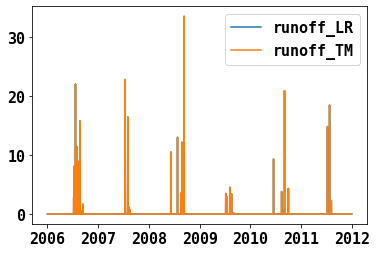

In [41]:
plt.plot(Q_mil.index,ds.Q,label = 'runoff_LR')
plt.plot(Q_mil.index,Q_mil, label = 'runoff_TM')
plt.legend()



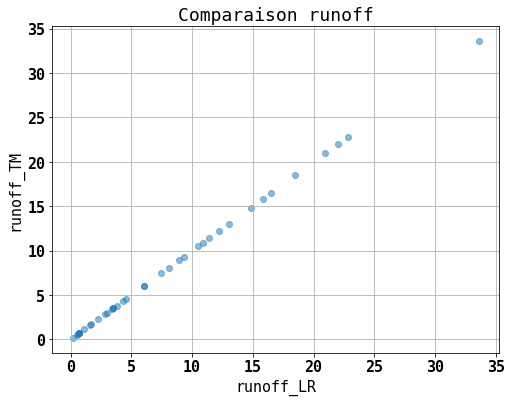

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(ds.Q[ds.Q!=0], Q_mil[Q_mil!=0], alpha=0.5)
plt.title(f'Comparaison runoff')
plt.xlabel('runoff_LR')
plt.ylabel('runoff_TM')
plt.grid(True)

## Statistique -- echelle annuelle

In [43]:
((etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum())

<xarray.DataArray 'evaptot' (time: 6)>
array([394.29567338, 283.32748955, 391.46349859, 382.86308342,
       360.24138664, 270.88981039])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [44]:

liste_diviseurs = np.array([581, 425, 556, 434, 429, 355])

resultat_divise = (((etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum()))/ liste_diviseurs

resultat_divise

<xarray.DataArray 'evaptot' (time: 6)>
array([0.67865004, 0.66665292, 0.70407104, 0.882173  , 0.83972351,
       0.76306989])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [45]:
178/463

0.38444924406047515

In [46]:
liste_diviseurs = np.array([581, 425, 556, 434, 429, 355])
liste_diviseurs.std()

79.24364678354698

In [47]:

liste_diviseurs = np.array([581, 425, 556, 434, 429, 355])

resultat_divise = (((etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum()))/ liste_diviseurs

resultat_divise

<xarray.DataArray 'evapsoil' (time: 6)>
array([0.37738405, 0.35908594, 0.31512624, 0.44967724, 0.43502012,
       0.3914458 ])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [48]:
168/463

0.36285097192224625

In [49]:
((etr_mil3_2.trans.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum())

<xarray.DataArray 'trans' (time: 6)>
array([174.70600932, 130.55499451, 215.12017518, 186.46747027,
       172.07613516, 131.15482428])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [50]:
liste_diviseurs = np.array([581, 425, 556, 434, 429, 355])

resultat_divise = (((etr_mil3_2.trans.mean(dim='y').resample(time='D').sum()).resample(time='Y').sum()))/ liste_diviseurs

resultat_divise

<xarray.DataArray 'trans' (time: 6)>
array([0.30069881, 0.30718822, 0.38690679, 0.42964855, 0.40110987,
       0.36945021])
Coordinates:
  * time            (time) datetime64[ns] 2006-12-31 2007-12-31 ... 2011-12-31
    reference_time  datetime64[ns] 2006-01-01

In [51]:
Budg_mil.mean()

Rainfall    463.050000
ETR         348.089133
Runoff       51.326926
Storage      19.123730
Drainage     44.510211
dtype: float64

In [52]:
Budg_mil.std()

Rainfall    86.802245
ETR         55.582456
Runoff      27.120064
Storage     45.877608
Drainage    23.293206
dtype: float64

In [53]:
liste_diviseurs = np.array([-4,-1, -2, -1, -2, -1,-2])
liste_diviseurs.std()

0.9897433186107869

In [54]:
liste_diviseurs = np.array([581, 425, 556, 434, 429, 355])
 
(Budg_mil[['Runoff','Storage','Drainage']].div(liste_diviseurs, axis=0))

Runoff   Storage  Drainage
2006  0.146152  0.149586  0.024010
2007  0.127460  0.130474  0.071741
2008  0.143086  0.025987  0.123750
2009  0.033677 -0.089260  0.171809
2010  0.091142 -0.035795  0.102934
2011  0.100296  0.033880  0.098853

### Annuel


In [55]:
import pandas as pd

# Créez une liste vide pour stocker les données
data_list = []

# Liste des valeurs de selected_data_stock
selected_data_stock_values = [87, 55, 14, -39, -15, 12]

# Itérez sur les années de 2006 à 2011
for year in range(2006, 2012):
    # Définissez les dates de début et de fin pour l'année en cours
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'

    # Effectuez les calculs pour ETR, evap et trans pour l'année en cours
    etr = (etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum())
    etr_trans = (etr_mil3_2.trans.mean(dim='y').resample(time='D').sum())
    etr_evp = (etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum())
    
    selected_data_pluie = (pluie_j.loc[start_date:end_date]).sum()
    selected_data_trans = etr_trans.sel(time=slice(start_date, end_date))
    selected_data_evap = etr_evp.sel(time=slice(start_date, end_date))
    selected_data_etr = etr.sel(time=slice(start_date, end_date))
    selected_data_runoff = (Q_mil.loc[start_date:end_date]).sum()
    
    # Sélectionnez la valeur de selected_data_stock correspondant à l'année actuelle
    selected_data_stock = selected_data_stock_values[year - 2006]
    
    selected_data_drain = selected_data_pluie - selected_data_etr.sum().values - selected_data_runoff - selected_data_stock

    # Enregistrez les résultats dans la liste
    data_list.append({
        "Année": year,
        "Pluie": selected_data_pluie,
        "ETR": selected_data_etr.sum().values,
        "evap": selected_data_evap.sum().values,
        "trans": selected_data_trans.sum().values,
        "runoff": selected_data_runoff,
        "stock": selected_data_stock,
        "drainage": selected_data_drain
    })

# Créez un DataFrame à partir de la liste de données
df_annee = pd.DataFrame(data_list)

# Affichage du DataFrame
print(df_annee)


   Année   Pluie                 ETR                evap               trans  \
0   2006  580.68   394.2956733821931  219.26013242253572   174.7060093224172   
1   2007  424.80   283.3274895548983   152.6115233485041  130.55499451165824   
2   2008  555.66   391.4634985949085  175.21019164914554  215.12017518387586   
3   2009  434.16    382.863083424818  195.15992399188562    186.467470270423   
4   2010  428.40  360.24138664350437   186.6236332145836  172.07613516315422   
5   2011  354.60  270.88981038578225  138.96325925084022   131.1548242810074   

      runoff  stock   drainage  
0  84.914528     87  14.469799  
1  54.170491     55  32.302020  
2  79.555969     14  70.640532  
3  14.615627    -39  75.681289  
4  39.099964    -15  44.058650  
5  35.604976     12  36.105213  


## Statistique -- echelle saisonnière

### Saison humide

In [56]:
import pandas as pd

# Créez une liste vide pour stocker les données
data_list = []

# Itérez sur les années de 2006 à 2011
for year in range(2006, 2012):
    # Définissez les dates de début et de fin pour l'année en cours
    start_date = f'{year}-05-01'
    end_date = f'{year}-10-31'

    # Effectuez les calculs pour ETR, evap et trans pour l'année en cours
    etr = (etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum())
    etr_trans = (etr_mil3_2.trans.mean(dim='y').resample(time='D').sum())
    etr_evp = (etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum())
    
    selected_data_pluie = (pluie_j.loc[start_date:end_date]).sum()
    selected_data_trans = etr_trans.sel(time=slice(start_date, end_date))
    selected_data_evap = etr_evp.sel(time=slice(start_date, end_date))
    selected_data_etr = etr.sel(time=slice(start_date, end_date))
    selected_data_runoff = (Q_mil.loc[start_date:end_date]).sum()
    selected_data_stock = stock_mil.loc[end_date] - stock_mil.loc[start_date]
    selected_data_drain = selected_data_pluie - selected_data_etr.sum().values - selected_data_runoff - selected_data_stock

    # Enregistrez les résultats dans la liste
    data_list.append({
        "Année": year,
        "Pluie":selected_data_pluie,
        "ETR": selected_data_etr.sum().values,
        "evap": selected_data_evap.sum().values,
        "trans": selected_data_trans.sum().values,
        "runoff" : selected_data_runoff,
        "stock":selected_data_stock,
        "drainage":selected_data_drain
    })

# Créez un DataFrame à partir de la liste de données
df_humide = pd.DataFrame(data_list)

# Affichage du DataFrame
print(df_humide)


   Année   Pluie                 ETR                evap               trans  \
0   2006  580.68    325.983080936458  216.19251572397553  109.46103357588714   
1   2007  423.72  246.40759549861758   151.7226562441711   94.52396818098471   
2   2008  555.66   342.8248337914464  174.78082925320876  166.91087277655592   
3   2009  434.16   336.4349070443421  194.09713125566572  141.10208662661273   
4   2010  423.36  330.13139807976796   183.4657366487954  145.12404316546179   
5   2011  354.60    250.723501160796  138.24571024844437  111.70606405868716   

      runoff       stock   drainage  
0  84.914528  162.550280   7.232112  
1  54.170491  107.653842  15.488072  
2  79.555969  101.118088  32.161109  
3  14.615627   47.869367  35.240098  
4  39.099964   32.691147  21.437491  
5  35.604976   50.185312  18.086210  


### Saison sèche

In [57]:
df_annee.subtract(df_humide)

Année  Pluie        ETR      evap      trans        runoff      stock  \
0      0   0.00  68.312592  3.067617  65.244976  0.000000e+00 -75.550280   
1      0   1.08  36.919894  0.888867  36.031026  0.000000e+00 -52.653842   
2      0   0.00  48.638665  0.429362  48.209302  2.842171e-14 -87.118088   
3      0   0.00  46.428176  1.062793  45.365384  0.000000e+00 -86.869367   
4      0   5.04  30.109989  3.157897  26.952092  0.000000e+00 -47.691147   
5      0   0.00  20.166309  0.717549   19.44876  0.000000e+00 -38.185312   

    drainage  
0   7.237687  
1  16.813948  
2  38.479423  
3  40.441191  
4  22.621158  
5  18.019003

In [58]:
import pandas as pd

# Créez une liste vide pour stocker les données
data_list = []

# Itérez sur les années de 2006 à 2011
for year in range(2006, 2011):
    # Définissez les dates de début et de fin pour l'année en cours
    start_date = f'{year}-11-01'
    end_date = f'{year+1}-04-30'

    # Effectuez les calculs pour ETR, evap et trans pour l'année en cours
    etr = (etr_mil3_2.evaptot.mean(dim='y').resample(time='D').sum())
    etr_trans = (etr_mil3_2.trans.mean(dim='y').resample(time='D').sum())
    etr_evp = (etr_mil3_2.evapsoil.mean(dim='y').resample(time='D').sum())
    
    selected_data_pluie = (pluie_j.loc[start_date:end_date]).sum()
    selected_data_trans = etr_trans.sel(time=slice(start_date, end_date))
    selected_data_evap = etr_evp.sel(time=slice(start_date, end_date))
    selected_data_etr = etr.sel(time=slice(start_date, end_date))
    selected_data_runoff = (Q_mil.loc[start_date:end_date]).sum()
    selected_data_stock = stock_mil.loc[end_date]
    selected_data_drain = selected_data_pluie - selected_data_etr.sum().values - selected_data_runoff - selected_data_stock

    # Enregistrez les résultats dans la liste
    data_list.append({
        "Année": year,
        "Pluie":selected_data_pluie,
        "ETR": selected_data_etr.sum().values,
        "evap": selected_data_evap.sum().values,
        "trans": selected_data_trans.sum().values,
        "runoff" : selected_data_runoff,
        "stock":selected_data_stock,
        "drainage":selected_data_drain
    })

# Créez un DataFrame à partir de la liste de données
df = pd.DataFrame(data_list)

# Affichage du DataFrame
print(df)


   Année  Pluie                ETR                 evap               trans  \
0   2006   1.08  51.96723435254718   0.9512144399158101  51.016019291617944   
1   2007   0.00  35.47171682065293  0.33108098626599386  35.140635833527305   
2   2008   0.00   48.9940871338883   0.2810440172710125   48.71304311649418   
3   2009   5.04  33.39921637053305   3.1525170643449028    30.2466993056558   
4   2010   0.00  31.36118861499424   1.3159139255189083   30.04527468956688   

   runoff       stock    drainage  
0     0.0   61.554104 -112.441338  
1     0.0  100.006685 -135.478402  
2     0.0  107.386670 -156.380758  
3     0.0  101.061946 -129.421162  
4     0.0   84.059041 -115.420230  


### Plan de flux nul

In [59]:
ds2 = mil_satur.interp(z=np.arange(0,-2,-0.05),method='linear')


In [60]:
#mil_press.press.differentiate('z').hvplot.quadmesh(x='time',y='z',clim=(-10,10),widget_type="scrubber",widget_location="bottom")

a = ds2.satur.hvplot.quadmesh(x='time',y='z',clim=(-10,10),widget_type="scrubber",widget_location="bottom")

b = xr.plot.contourf(mil_press.press.differentiate('z'),x='time',y='z',vmin =-1,vmax=1,levels=2)

AttributeError: 'DataArray' object has no attribute 'hvplot'

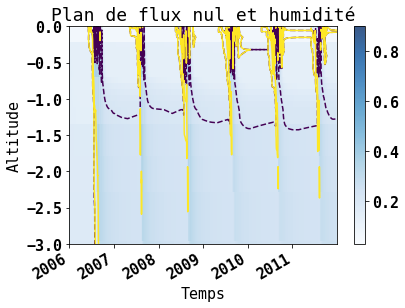

In [ ]:
xr.plot.contour(mil_press.press.differentiate('z'), x='time', y='z', vmin=-1, vmax=1, levels=2)
plt.gca().set_ylim([-3,0])

cmap = plt.cm.get_cmap('Blues')
x_time, y_z = np.meshgrid(mil_satur['time'], mil_satur['z'])
plt.pcolormesh(x_time, y_z, np.swapaxes(mil_satur['satur'].values,0,1) , cmap=cmap, alpha=0.8)

plt.title('Plan de flux nul et humidité')
plt.xlabel('Temps')
plt.ylabel('Altitude')
plt.colorbar()

plt.show()





In [ ]:
import scipy.interpolate
import datetime

# Définir la grille d'interpolation
#x_time = [datetime.timestamp(t) for t in mil_satur['time']]

timestamps = np.array([pd.Timestamp(x).timestamp() for x in mil_satur['time'].values])

#x_time = [t.timestamp() for t in mil_satur['time']]
x_time_interp = np.linspace(mil_satur['time'][0], mil_satur['time'][-1], 100)
y_z_interp = np.linspace(mil_satur['z'][0], mil_satur['z'][-1], 100)

# Créer une fonction d'interpolation pour les données d'humidité
f_interp = scipy.interpolate.interp2d(mil_satur['time'], mil_satur['z'], mil_satur['satur'].T, kind='linear')

# Évaluer l'interpolation aux points de la grille d'interpolation
humidite_interp = f_interp(x_time_interp, y_z_interp)

# Tracer le plan de flux nul et l'humidité interpolée
plt.contour(mil_press.press.differentiate('z'), x='time', y='z', vmin=-1, vmax=1, levels=2)
plt.pcolormesh(x_time_interp, y_z_interp, humidite_interp, cmap=cmap, alpha=0.8)

plt.title('Plan de flux nul et humidité interpolée')
plt.xlabel('Temps')
plt.ylabel('Altitude')
plt.colorbar()

plt.show()


UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

## Relation Pluie - Ruissellement

In [ ]:
'''
count = 0

for entry in os.scandir(res_path):
    if entry.is_dir() and entry.name.startswith('sim'):
        count += 1

df = pd.DataFrame(pluie_j,index=pd.date_range("2006-01-01", periods=1096,freq='D'))


for l in np.arange(0,count):

    datadir3_2 = res_path + 'sim_' + '{0:01}'.format(l + 1) + '/sim_' + '{0:01}'.format(l + 1) + '/'
    
    debit_jach = debit_2D(datadir3_2,"runoff_mil_06_09_2D.nc")

    debit_jach = debit_jach[:-365]

    df[f"sim_{l + 1}"] = debit_jach.values

    
    fig, ax = plt.subplots(figsize=(15,12))

    ax.plot(debit_jach.index,debit_jach)

    a = plt.gca() 

    plt.savefig(res_path + 'plots/runoff/runoff_sim_' + '{0:01}'.format(l + 1))

    plt.close()

    ###

df_filtered = pd.DataFrame()

for column in df.columns:
    if len(df[column][df[column] > 0]) > 0:
        df_filtered[column] = df[column]

## Ruissellement

for column in df_filtered.columns:

    val = df_filtered[column][df_filtered[column] > 0].values
    ind = df_filtered[column][df_filtered[column] > 0].index

    selected_values = df.loc[ind, 'Precip']   


    data_df = pd.DataFrame(val,selected_values,columns=['runoff'])

    data_df.reset_index(inplace=True)

    data_df.index = ind

    fig, ax = plt.subplots(figsize=(15,12))

    ax.scatter(data_df['Precip'],data_df['runoff'])

    # Ajouter des étiquettes et un titre
    ax.set_xlabel('Pluie')
    ax.set_ylabel('Runoff')

    # Afficher le scatterplot

    a = plt.gca() 

    plt.savefig(res_path + 'plots/scatter/' + column + '.png')

    plt.close()
    
    ## Calcul du coefficient de ruissellement evenementiel

    data_df['Cr'] = round((data_df['runoff']/data_df['Precip'])*100,3)

    data_df.to_csv(res_path + 'plots/results_' + column + '.txt', float_format='%2.4f', sep=' ', header=True, index=False)


    #data_df.to_csv("/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/results_'+ column +'.txt",float_format='%2.4f', sep=' ', header=True, index=False)
    '''

'\ncount = 0\n\nfor entry in os.scandir(res_path):\n    if entry.is_dir() and entry.name.startswith(\'sim\'):\n        count += 1\n\ndf = pd.DataFrame(pluie_j,index=pd.date_range("2006-01-01", periods=1096,freq=\'D\'))\n\n\nfor l in np.arange(0,count):\n\n    datadir3_2 = res_path + \'sim_\' + \'{0:01}\'.format(l + 1) + \'/sim_\' + \'{0:01}\'.format(l + 1) + \'/\'\n    \n    debit_jach = debit_2D(datadir3_2,"runoff_mil_06_09_2D.nc")\n\n    debit_jach = debit_jach[:-365]\n\n    df[f"sim_{l + 1}"] = debit_jach.values\n\n    \n    fig, ax = plt.subplots(figsize=(15,12))\n\n    ax.plot(debit_jach.index,debit_jach)\n\n    a = plt.gca() \n\n    plt.savefig(res_path + \'plots/runoff/runoff_sim_\' + \'{0:01}\'.format(l + 1))\n\n    plt.close()\n\n    ###\n\ndf_filtered = pd.DataFrame()\n\nfor column in df.columns:\n    if len(df[column][df[column] > 0]) > 0:\n        df_filtered[column] = df[column]\n\n## Ruissellement\n\nfor column in df_filtered.columns:\n\n    val = df_filtered[column][df_f

## Stock d'eau

<AxesSubplot:>

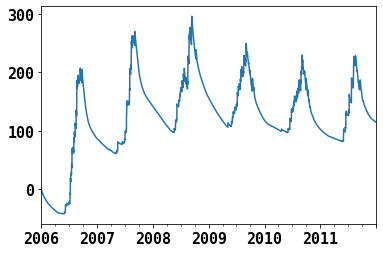

In [ ]:
stock_mil.plot()

In [ ]:
obs_hum_mil.loc['2006']

10 cm     50 cm  100 cm  150 cm  200 cm  250 cm
2006-01-01  0.024104  0.047923  0.0495  0.0520  0.0612  0.0651
2006-01-02  0.024085  0.047871  0.0495  0.0520  0.0612  0.0651
2006-01-03  0.024081  0.047854  0.0495  0.0520  0.0612  0.0651
2006-01-04  0.024071  0.047821  0.0495  0.0520  0.0612  0.0651
2006-01-05  0.024006  0.047850  0.0495  0.0520  0.0612  0.0651
...              ...       ...     ...     ...     ...     ...
2006-12-27  0.024290  0.048942  0.0503  0.0529  0.0629  0.0717
2006-12-28  0.024265  0.048896  0.0503  0.0529  0.0629  0.0717
2006-12-29  0.024281  0.048842  0.0503  0.0529  0.0629  0.0717
2006-12-30  0.024285  0.048800  0.0503  0.0529  0.0629  0.0717
2006-12-31  0.024269  0.048752  0.0503  0.0529  0.0629  0.0717

[365 rows x 6 columns]

In [ ]:
hum_h5 = obs_hum_mil.loc['2006'][['150 cm','200 cm','250 cm']].mean(axis=1)
hum_h5

2006-01-01    0.059433
2006-01-02    0.059433
2006-01-03    0.059433
2006-01-04    0.059433
2006-01-05    0.059433
                ...   
2006-12-27    0.062500
2006-12-28    0.062500
2006-12-29    0.062500
2006-12-30    0.062500
2006-12-31    0.062500
Freq: D, Length: 365, dtype: float64

In [ ]:
valeurs_en_m3m3_10 = obs_hum_mil.loc['2006']['10 cm']
valeurs_en_mm_10 = (valeurs_en_m3m3_10 * 20 * 1.68) * 10
valeurs_en_mm_10 

2006-01-01    8.0990
2006-01-02    8.0927
2006-01-03    8.0913
2006-01-04    8.0878
2006-01-05    8.0661
               ...  
2006-12-27    8.1613
2006-12-28    8.1529
2006-12-29    8.1585
2006-12-30    8.1599
2006-12-31    8.1543
Freq: D, Name: 10 cm, Length: 365, dtype: float64

In [ ]:
valeurs_en_m3m3_50 = obs_hum_mil.loc['2006']['50 cm']
valeurs_en_mm_50 = (valeurs_en_m3m3_50 * 50 * 1.82) * 10
valeurs_en_mm_50 

2006-01-01    43.609854
2006-01-02    43.562458
2006-01-03    43.547292
2006-01-04    43.516958
2006-01-05    43.543500
                ...    
2006-12-27    44.536917
2006-12-28    44.495208
2006-12-29    44.445917
2006-12-30    44.408000
2006-12-31    44.364396
Freq: D, Name: 50 cm, Length: 365, dtype: float64

In [ ]:
valeurs_en_m3m3_100 = obs_hum_mil.loc['2006']['100 cm']
valeurs_en_mm_100 = (valeurs_en_m3m3_100 * 50 * 1.72) * 10
valeurs_en_mm_100 

2006-01-01    42.570
2006-01-02    42.570
2006-01-03    42.570
2006-01-04    42.570
2006-01-05    42.570
               ...  
2006-12-27    43.258
2006-12-28    43.258
2006-12-29    43.258
2006-12-30    43.258
2006-12-31    43.258
Freq: D, Name: 100 cm, Length: 365, dtype: float64

In [ ]:
valeurs_en_m3m3_h5 = hum_h5
valeurs_en_m3m3_h5 = (valeurs_en_m3m3_h5 * 280 * 1.75) * 10
valeurs_en_m3m3_h5

2006-01-01    291.223333
2006-01-02    291.223333
2006-01-03    291.223333
2006-01-04    291.223333
2006-01-05    291.223333
                 ...    
2006-12-27    306.250000
2006-12-28    306.250000
2006-12-29    306.250000
2006-12-30    306.250000
2006-12-31    306.250000
Freq: D, Length: 365, dtype: float64

In [ ]:
valeurs_en_m3m3_200 = obs_hum_mil.loc['2006']['200 cm']
valeurs_en_mm_200 = (valeurs_en_m3m3_200 * 50 * 1.8) * 10
valeurs_en_mm_200 

2006-01-01    55.08
2006-01-02    55.08
2006-01-03    55.08
2006-01-04    55.08
2006-01-05    55.08
              ...  
2006-12-27    56.61
2006-12-28    56.61
2006-12-29    56.61
2006-12-30    56.61
2006-12-31    56.61
Freq: D, Name: 200 cm, Length: 365, dtype: float64

In [ ]:
valeurs_en_m3m3_250 = obs_hum_mil.loc['2006']['250 cm']
valeurs_en_mm_250 = (valeurs_en_m3m3_250 * 50 * 1.83) * 10
valeurs_en_mm_250 

2006-01-01    59.5665
2006-01-02    59.5665
2006-01-03    59.5665
2006-01-04    59.5665
2006-01-05    59.5665
               ...   
2006-12-27    65.6055
2006-12-28    65.6055
2006-12-29    65.6055
2006-12-30    65.6055
2006-12-31    65.6055
Freq: D, Name: 250 cm, Length: 365, dtype: float64

### 

In [ ]:
etr_mil3_2

<xarray.Dataset>
Dimensions:         (time: 52584, y: 1)
Coordinates:
  * time            (time) datetime64[ns] 2006-01-01 ... 2011-12-31T23:00:00
    reference_time  datetime64[ns] 2006-01-01
Dimensions without coordinates: y
Data variables:
    evaptot         (time, y) float64 0.04195 0.02037 ... 3.48e-13 6.423e-14
    evapveg         (time, y) float64 0.0001518 8.526e-05 ... 7.515e-14
    evapsoil        (time, y) float64 0.0418 0.02028 ... -5.883e-14 -1.093e-14
    trans           (time, y) float64 0.0001518 8.526e-05 6.268e-05 ... 0.0 0.0
    infl            (time, y) float64 -0.0418 -0.02028 -0.01499 ... 0.0 0.0

In [ ]:
## Calcul de la part évaporative

FE = etr_mil3_2.evaptot / etr_mil3_2.evapsoil
FE

<xarray.DataArray (time: 52584, y: 1)>
array([[ 1.0036318 ],
       [ 1.00420407],
       [ 1.00418122],
       ...,
       [-5.25319838],
       [-5.91571857],
       [-5.87874719]])
Coordinates:
  * time            (time) datetime64[ns] 2006-01-01 ... 2011-12-31T23:00:00
    reference_time  datetime64[ns] 2006-01-01
Dimensions without coordinates: y